In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data=pd.read_csv("Dsata Set for Assignment 1 (1).csv")
data.drop("id",axis=1,inplace=True)
data_modified = data.replace("M",1).replace("B",0)
data_modified.dropna(inplace=True)
# for column in data_modified.columns[1:]:
#     data_modified[column] = (data_modified[column] - data_modified[column].mean())/data_modified[column].std()
# data_modified.fillna(0,inplace= True)
df= data_modified.sample(frac=2/3)
x_train= df.drop("diagnosis",axis=1)
y_train = df["diagnosis"]
x_test = data_modified.drop(df.index)
y_test = x_test["diagnosis"]
x_test=x_test.drop("diagnosis",axis=1)
x_train= x_train.to_numpy()
y_train= y_train.to_numpy()
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()

In [300]:
def sigmoid(w,x):
    y= np.dot(w,x)
    if y<0:
        return np.exp(y)/(1+np.exp(y))
    else:
        return 1/(1+np.exp(-y))
  
def cost(w,x,y):
    z=0
    for i in range(len(x)):
        h= sigmoid(w,x[i])
        if h==1:
            h=1-(10**(-16))
        elif h==0:
            h=10**(-16)
        y1=y[i]
        z = z + (-((y1*np.log(h))+((1-y1)*np.log((1-h)))))
    return z/len(y)
def grad(w,x,y):
    h= sigmoid(w,x)
    return (h-y)*x

In [303]:
def grad_batch(w,x,y):
    grad1=np.zeros(30)
    for i in range(len(x)):
        grad1= grad1+(grad(w,x[i],y[i]))
    return grad1/x.shape[0]

def batch(x,y,lr):
    w= np.zeros(30)
    e2=1
    e1=0
    e_list = []
    epoch_count = 0
    while 1:
        e1= cost(w,x,y)
        w = w - lr*(grad_batch(w,x,y))
        e2= cost(w,x,y)
        e_list.append(e2)
        epoch_count += 1
        if(np.abs(e2-e1)<=0.001):
            if(1000<=epoch_count<=10000 ):
                    return w, e_list, epoch_count
        else:
            if(epoch_count>=15000):
                    return w, e_list, epoch_count
        # print(abs(e2-e1))


def minibatch(x,y,batch_size,lr):
    w=np.zeros(30)
    e2=1
    e1=0
    e_list = []
    epoch_count = 0
    while 1 :
        k = np.random.randint(0,(len(x)-batch_size))
        x1 = x[k:(k+batch_size)]
        y1 =y[k:(k+batch_size)]
        e1=cost(w,x1,y1)
        w= w- lr*(grad_batch(w,x1,y1))
        e2 = cost(w,x,y)
        # print(abs(e2-e1))
        e_list.append(e2)
        epoch_count += 1
        if(np.abs(e2-e1)<=0.001):
            if(1000<=epoch_count<=10000 ):
                    return w, e_list, epoch_count
        else:
            if(epoch_count>=15000):
                 return w, e_list, epoch_count
    



def stoch(x,y,lr):
    w= np.zeros(30)
    size = len(x)
    e2=1
    e1=0
    e_list = []
    epoch_count = 0
    print(size)
    while 1:
            j= np.random.randint(0,size)
            e1= cost(w,x,y)
            w= w-lr*grad(w,x[j],y[j]) 
            e2= cost(w,x,y)
            # print(np.abs(e2-e1))
            e_list.append(e2)
            epoch_count += 1
            if(np.abs(e2-e1)<=0.000001):
                 if(1000<=epoch_count<=10000 ):
                    return w, e_list, epoch_count
            else:
                if(epoch_count>=15000):
                     return w, e_list, epoch_count

w1,e1,ep1 =batch(x_train,y_train,0.0001)
w2,e2,ep2 = minibatch(x_train,y_train,50,0.0001)
w3,e3,ep3 = stoch(x_train,y_train,0.0001)

375


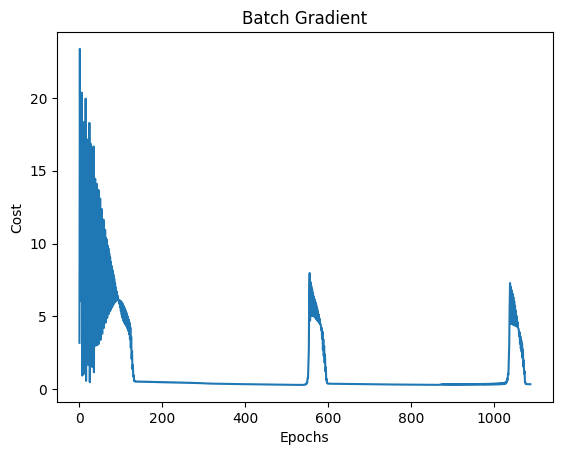

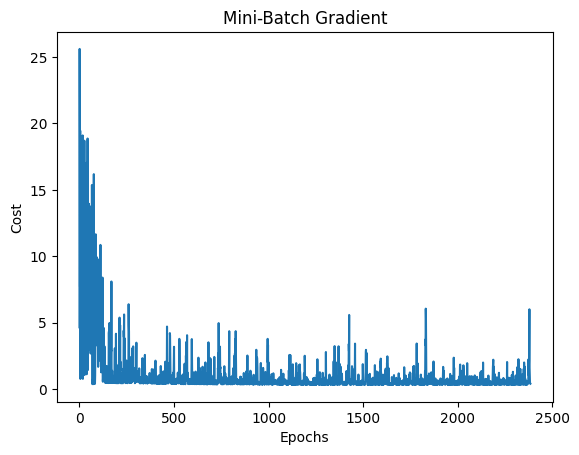

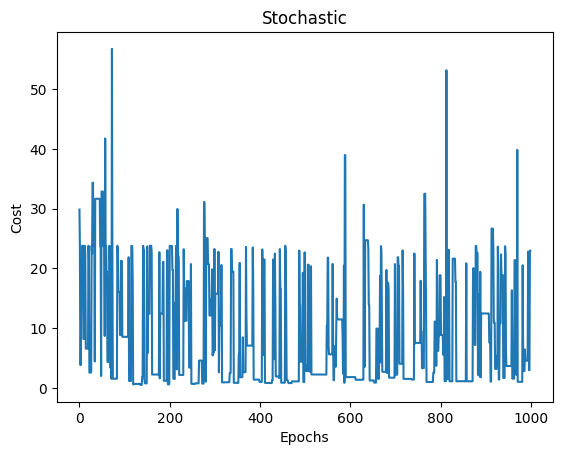

In [304]:
import matplotlib.pyplot as plt
plt.plot(range(ep1), e1)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title("Batch Gradient")
plt.show()

plt.plot(range(ep2), e2)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title("Mini-Batch Gradient")
plt.show()

plt.plot(range(ep3), e3)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title("Stochastic")
plt.show()


In [305]:
def prediction(x,w,threshold):
    x=x.T
    h = sigmoid(w,x)
    if h>=threshold:
        return 1
    else:
        return 0

def evaluate(x,y,w,threshold):
    count=np.zeros((2,2))
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(x)):
        pred = prediction(x[i],w,threshold)
        if y[i] == 0 and pred == 0:
          tn += 1
        if y[i] == 0 and pred == 1:
          fp += 1
        if y[i] == 1 and pred == 0:
          fn += 1
        if y[i] == 1 and pred == 1:
          tp += 1
    
    count[0][0]=tn
    count[0][1]=fp
    count[1][0]=fn
    count[1][1]=tp
    q=1e-15
     
    recall = tp/(tp+fn+q)
    precision = tp/(tp+fp+q)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    return precision,recall,accuracy

precision,recall,accuracy = evaluate(x_test,y_test,w1,0.5)
print(accuracy)

0.9042553191489362


In [315]:
def models(mode,lr,threshold,batch_size):

    if(mode==0):
        el=[]
        w = np.zeros(30)
        e = []
        ep = np.zeros((5,))
        a = np.zeros((5,10))
        p= np.zeros((5,10))
        r= np.zeros((5,10))
        wh=np.zeros(30)
        eh=[]
        eph=0
        ac1=0
        pr1=0
        re1=0


        for i in range(10):
            print("BATCH")
            df= data_modified.sample(frac=2/3)
            x_train= df.drop("diagnosis",axis=1)
            y_train = df["diagnosis"]
            x_test = data_modified.drop(df.index)
            y_test = x_test["diagnosis"]
            x_test=x_test.drop("diagnosis",axis=1)
            print(x_test,x_train,y_test,y_train)
            x_train= x_train.to_numpy()
            y_train= y_train.to_numpy()
            x_test=x_test.to_numpy()
            y_test=y_test.to_numpy()
            w,eh,eph = batch(x_train,y_train,lr)
            for j in range(len(threshold)):
                print("Threshold =", threshold[j])
                pr1,re1,ac1= evaluate(x_test,y_test,w,threshold[j])
                print(ac1,re1,pr1)
                a[j][i]+= ac1
                p[j][i]+= pr1
                r[j][i]+= re1
                e.append(el)
            
                if threshold[j]==0.5:
                   
                    plt.plot(range(eph), eh)
                    plt.xlabel('Epochs')
                    plt.ylabel('Cost')
                    plt.title("Batch with threshold =0.5")
                    plt.show()
        
        for i in range(len(threshold)):
            av_ac=0
            av_pr=0
            av_re=0
            for j in range(10):

                av_ac+=a[i][j]/10
                av_pr+=p[i][j]/10
                av_re+=r[i][j]/10


            av_ac=av_ac
            av_pr=av_pr
            av_re=av_re
            print("Average acucuracy for ",threshold[i],"threshold is =", av_ac)
            print("Average precision for ",threshold[i],"threshold is =", av_pr) 
            print("Average recall for ",threshold[i],"threshold is =", av_re) 

    


    

    elif (mode==1):    
        el=[]
        w = np.zeros(30)
        e = []
        ep = np.zeros((5,1))
        a = np.zeros((5,10))
        p= np.zeros((5,10))
        r= np.zeros((5,10))
        wh=np.zeros(30)
        eh=[]
        eph=0
        ac1=0
        pr1=0
        re1=0
        print("MINI-BATCH")
        for i in range(10):
            df= data_modified.sample(frac=2/3)
            x_train= df.drop("diagnosis",axis=1)
            y_train = df["diagnosis"]
            x_test = data_modified.drop(df.index)
            y_test = x_test["diagnosis"]
            x_test=x_test.drop("diagnosis",axis=1)
            x_train= x_train.to_numpy()
            y_train= y_train.to_numpy()
            x_test=x_test.to_numpy()
            y_test=y_test.to_numpy()
            w,eh,eph = minibatch(x_train,y_train,batch_size,lr)
            for j in range(len(threshold)):
                print("Threshold =", threshold[j])
                pr1,re1,ac1= evaluate(x_test,y_test,w,threshold[j])
                a[j][i]+= ac1
                p[j][i]+= pr1
                r[j][i]+= re1
                e.append(el)
                if threshold[j]==0.5:

                    plt.plot(range(eph), eh)
                    plt.xlabel('Epochs')
                    plt.ylabel('Cost')
                    plt.title("Mini-Batch with threshold =0.5")
                    plt.show()
        
        for i in range(len(threshold)):
            av_ac=0
            av_pr=0
            av_re=0
            for j in range(10):

                av_ac+=a[i][j]/10
                av_pr+=p[i][j]/10
                av_re+=r[i][j]/10


            av_ac=av_ac
            av_pr=av_pr
            av_re=av_re
            print("Average acucuracy for ",threshold[i],"threshold is =", av_ac)
            print("Average precision for ",threshold[i],"threshold is =", av_pr) 
            print("Average recall for ",threshold[i],"threshold is =", av_re) 


    else:
        el=[]
        w = np.zeros(30)
        e = []
        ep = np.zeros((5,1))
        a = np.zeros((5,10))
        p= np.zeros((5,10))
        r= np.zeros((5,10))
        wh=np.zeros(30)
        eh=[]
        ac1=0
        pr1=0
        re1=0
        eph=0
        print("STOCHASTIC")

        for i in range(10):
            df= data_modified.sample(frac=2/3)
            x_train= df.drop("diagnosis",axis=1)
            y_train = df["diagnosis"]
            x_test = data_modified.drop(df.index)
            y_test = x_test["diagnosis"]
            x_test=x_test.drop("diagnosis",axis=1)
            x_train= x_train.to_numpy()
            y_train= y_train.to_numpy()
            x_test=x_test.to_numpy()
            y_test=y_test.to_numpy()
            w,eh,eph = stoch(x_train,y_train,lr)
            for j in range(len(threshold)):
                print("Threshold =", threshold[j])

                pr1,re1,ac1= evaluate(x_test,y_test,w,threshold[j])
                a[j][i]+= ac1
                p[j][i]+= pr1
                r[j][i]+= re1
                e.append(el)
                if threshold[j]==0.5:

                    plt.plot(range(eph), eh)
                    plt.xlabel('Epochs')
                    plt.ylabel('Cost')
                    plt.title("Stochastic with threshold =0.5",)
                    plt.show()
        

        for i in range(len(threshold)):
            av_ac=0
            av_pr=0
            av_re=0
            for j in range(10):

                av_ac+=a[i][j]/10
                av_pr+=p[i][j]/10
                av_re+=r[i][j]/10


            av_ac=av_ac
            av_pr=av_pr
            av_re=av_re
            print("Average acucuracy for ",threshold[i],"threshold is =", av_ac)
            print("Average precision for ",threshold[i],"threshold is =", av_pr) 
            print("Average recall for ",threshold[i],"threshold is =", av_re) 


In [313]:
threshval=[0.3,0.4,0.5,0.6,0.7]
for i in range(len(threshval)):
    print(threshval[i])
    

0.3
0.4
0.5
0.6
0.7


Learning Rate= 0.01
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2         19.690         21.25          130.00     1203.0          0.10960   
4         20.290         14.34          135.10     1297.0          0.10030   
7         13.710         20.83           90.20      577.9          0.11890   
9         12.460         24.04           83.97      475.9          0.11860   
12        19.170         24.80          132.40     1123.0          0.09740   
..           ...           ...             ...        ...              ...   
557        9.423         27.88           59.26      271.3          0.08123   
560       14.050         27.15           91.38      600.4          0.09929   
562       15.220         30.62          103.40      716.9          0.10480   
564       21.560         22.39          142.00     1479.0          0.11100   
565       20.130         28.25          131.20     1261.0          0.09780   

     compactness_mean  concavity_mean

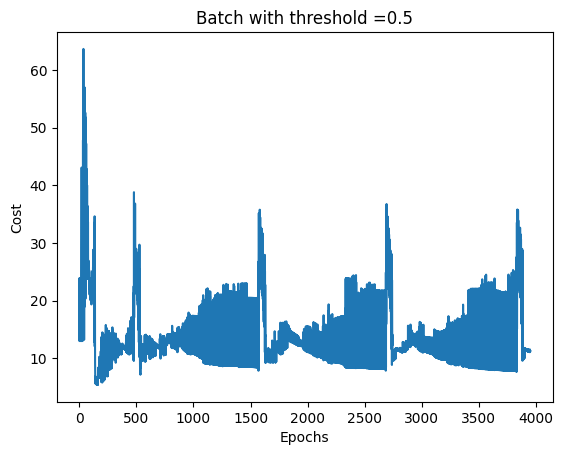

Threshold = 0.6
0.8776595744680851 0.8860759493670886 0.8333333333333334
Threshold = 0.7
0.8776595744680851 0.8860759493670886 0.8333333333333334
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
4          20.29         14.34          135.10     1297.0          0.10030   
5          12.45         15.70           82.57      477.1          0.12780   
..           ...           ...             ...        ...              ...   
555        10.29         27.61           65.67      321.4          0.09030   
563        20.92         25.09          143.00     1347.0          0.10990   
565        20.13         28.25          131.20     1261.0          0.09780   
567        20.60         29.33          140.10     1265.0          0

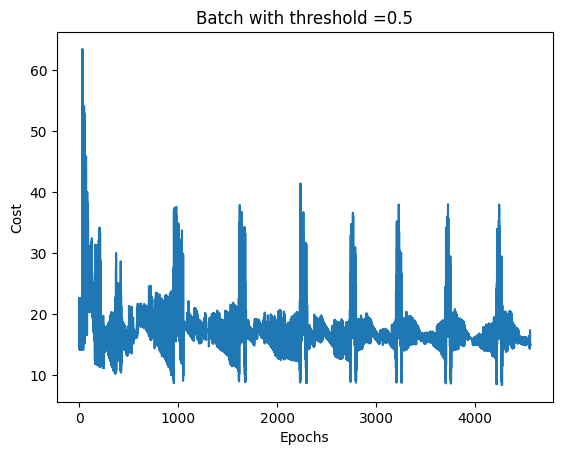

Threshold = 0.6
0.9308510638297872 0.9253731343283582 0.8857142857142857
Threshold = 0.7
0.9308510638297872 0.9253731343283582 0.8857142857142857
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
5         12.450         15.70           82.57      477.1          0.12780   
9         12.460         24.04           83.97      475.9          0.11860   
11        15.780         17.89          103.60      781.0          0.09710   
..           ...           ...             ...        ...              ...   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
558       14.590         22.68           96.39      657.1          0.08473   
565       20.130         28.25          131.20     1261.0          0

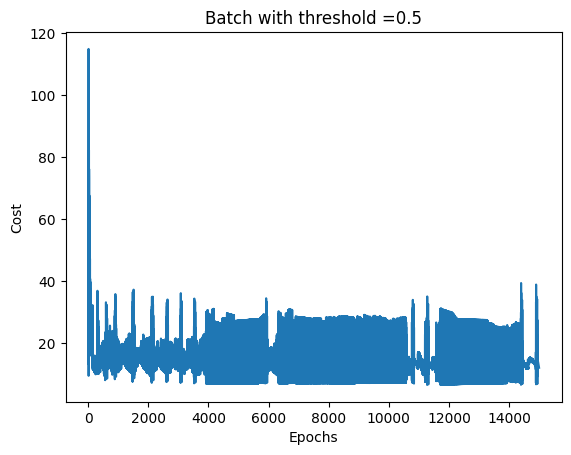

Threshold = 0.6
0.9202127659574468 0.918918918918919 0.8831168831168831
Threshold = 0.7
0.9202127659574468 0.918918918918919 0.8831168831168831
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
7          13.71         20.83           90.20      577.9          0.11890   
8          13.00         21.82           87.50      519.8          0.12730   
10         16.02         23.24          102.70      797.8          0.08206   
11         15.78         17.89          103.60      781.0          0.09710   
13         15.85         23.95          103.70      782.7          0.08401   
..           ...           ...             ...        ...              ...   
555        10.29         27.61           65.67      321.4          0.09030   
558        14.59         22.68           96.39      657.1          0.08473   
559        11.51         23.93           74.52      403.5          0.09261   
564        21.56         22.39          142.00     1479.0          0.1

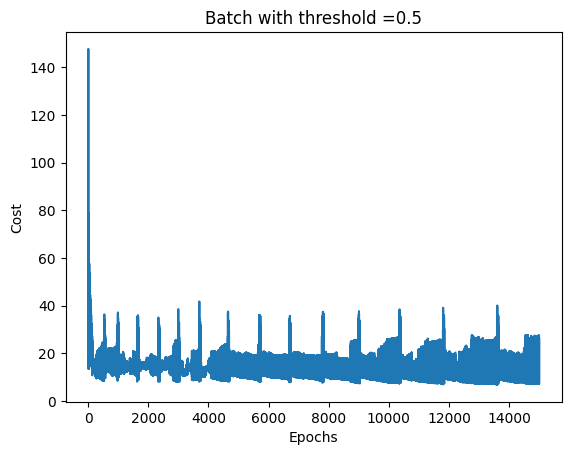

Threshold = 0.6
0.8936170212765957 0.7534246575342466 0.9649122807017544
Threshold = 0.7
0.8936170212765957 0.7534246575342466 0.9649122807017544
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1         20.570         17.77          132.90     1326.0          0.08474   
3         11.420         20.38           77.58      386.1          0.14250   
5         12.450         15.70           82.57      477.1          0.12780   
7         13.710         20.83           90.20      577.9          0.11890   
11        15.780         17.89          103.60      781.0          0.09710   
..           ...           ...             ...        ...              ...   
551       11.130         22.44           71.49      378.4          0.09566   
557        9.423         27.88           59.26      271.3          0.08123   
558       14.590         22.68           96.39      657.1          0.08473   
560       14.050         27.15           91.38      600.4          0

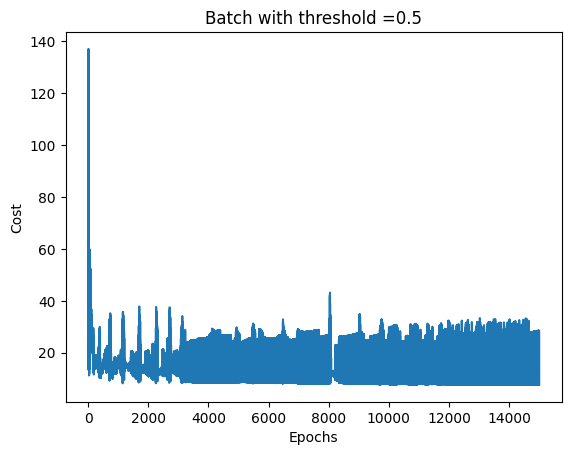

Threshold = 0.6
0.8617021276595744 0.9571428571428572 0.7444444444444445
Threshold = 0.7
0.8617021276595744 0.9571428571428572 0.7444444444444445
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
3          11.42         20.38           77.58      386.1          0.14250   
5          12.45         15.70           82.57      477.1          0.12780   
6          18.25         19.98          119.60     1040.0          0.09463   
..           ...           ...             ...        ...              ...   
537        11.69         24.44           76.37      406.4          0.12360   
543        13.21         28.06           84.88      538.4          0.08671   
561        11.20         29.37           70.67      386.0          0.07449   
562        15.22         30.62          103.40      716.9          0

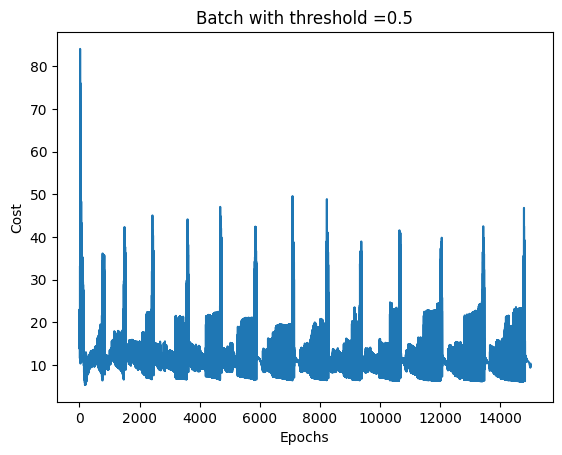

Threshold = 0.6
0.8882978723404256 0.8428571428571429 0.855072463768116
Threshold = 0.7
0.8882978723404256 0.8428571428571429 0.855072463768116
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
2          19.69         21.25          130.00     1203.0          0.10960   
6          18.25         19.98          119.60     1040.0          0.09463   
7          13.71         20.83           90.20      577.9          0.11890   
8          13.00         21.82           87.50      519.8          0.12730   
10         16.02         23.24          102.70      797.8          0.08206   
..           ...           ...             ...        ...              ...   
556        10.16         19.59           64.73      311.7          0.10030   
558        14.59         22.68           96.39      657.1          0.08473   
559        11.51         23.93           74.52      403.5          0.09261   
561        11.20         29.37           70.67      386.0          0.0

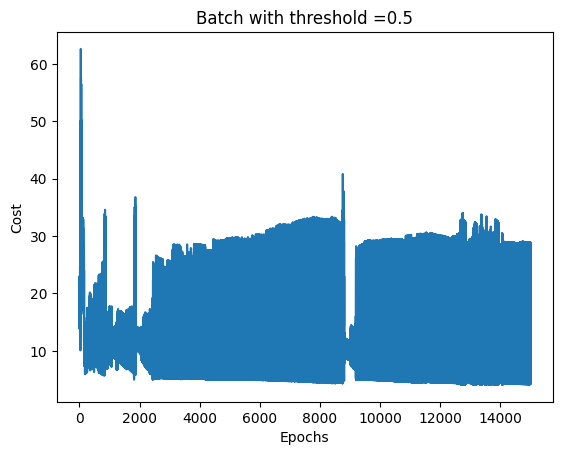

Threshold = 0.6
0.8563829787234043 0.9428571428571428 0.7415730337078652
Threshold = 0.7
0.8563829787234043 0.9428571428571428 0.7415730337078652
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
7          13.71         20.83           90.20      577.9          0.11890   
8          13.00         21.82           87.50      519.8          0.12730   
10         16.02         23.24          102.70      797.8          0.08206   
23         21.16         23.04          137.20     1404.0          0.09428   
..           ...           ...             ...        ...              ...   
546        10.32         16.35           65.31      324.9          0.09434   
555        10.29         27.61           65.67      321.4          0.09030   
561        11.20         29.37           70.67      386.0          0.07449   
567        20.60         29.33          140.10     1265.0          0

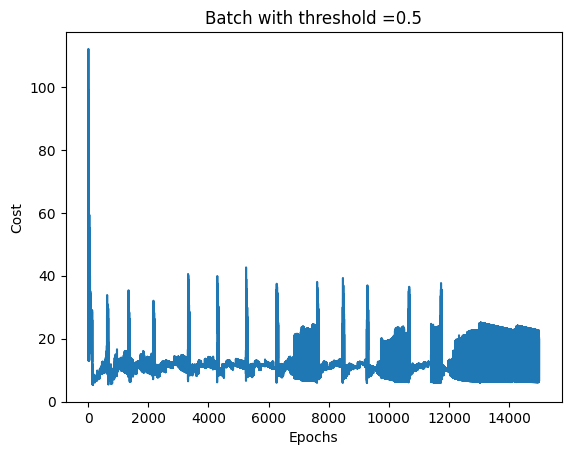

Threshold = 0.6
0.8936170212765957 0.7692307692307693 0.967741935483871
Threshold = 0.7
0.8936170212765957 0.7692307692307693 0.967741935483871
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
9         12.460         24.04           83.97      475.9          0.11860   
16        14.680         20.13           94.74      684.5          0.09867   
..           ...           ...             ...        ...              ...   
551       11.130         22.44           71.49      378.4          0.09566   
553        9.333         21.94           59.01      264.0          0.09240   
557        9.423         27.88           59.26      271.3          0.08123   
561       11.200         29.37           70.67      386.0          0.0

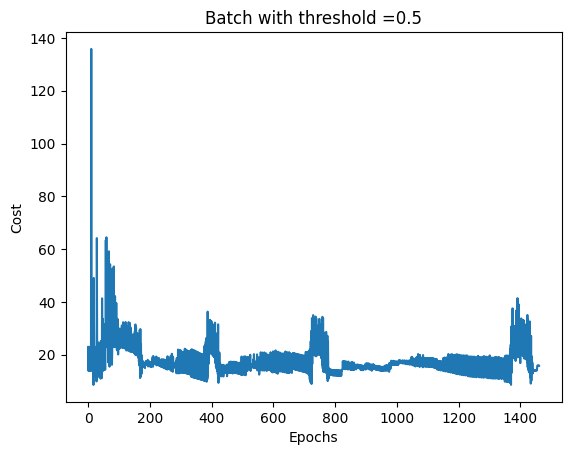

Threshold = 0.6
0.9148936170212766 0.9 0.875
Threshold = 0.7
0.9148936170212766 0.9 0.875
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
5          12.45         15.70           82.57      477.1          0.12780   
..           ...           ...             ...        ...              ...   
555        10.29         27.61           65.67      321.4          0.09030   
558        14.59         22.68           96.39      657.1          0.08473   
560        14.05         27.15           91.38      600.4          0.09929   
563        20.92         25.09          143.00     1347.0          0.10990   
565        20.13         28.25          131.20

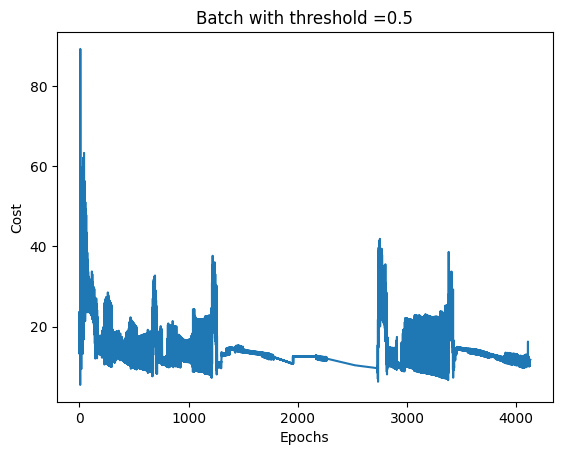

Threshold = 0.6
0.9042553191489362 0.8181818181818182 0.9402985074626866
Threshold = 0.7
0.9042553191489362 0.8181818181818182 0.9402985074626866
Average acucuracy for  0.3 threshold is = 0.8941489361702127
Average precision for  0.3 threshold is = 0.869120716773324
Average recall for  0.3 threshold is = 0.8714062390418343
Average acucuracy for  0.4 threshold is = 0.8941489361702127
Average precision for  0.4 threshold is = 0.869120716773324
Average recall for  0.4 threshold is = 0.8714062390418343
Average acucuracy for  0.5 threshold is = 0.8941489361702127
Average precision for  0.5 threshold is = 0.869120716773324
Average recall for  0.5 threshold is = 0.8714062390418343
Average acucuracy for  0.6 threshold is = 0.8941489361702127
Average precision for  0.6 threshold is = 0.869120716773324
Average recall for  0.6 threshold is = 0.8714062390418343
Average acucuracy for  0.7 threshold is = 0.8941489361702127
Average precision for  0.7 threshold is = 0.869120716773324
Average recall fo

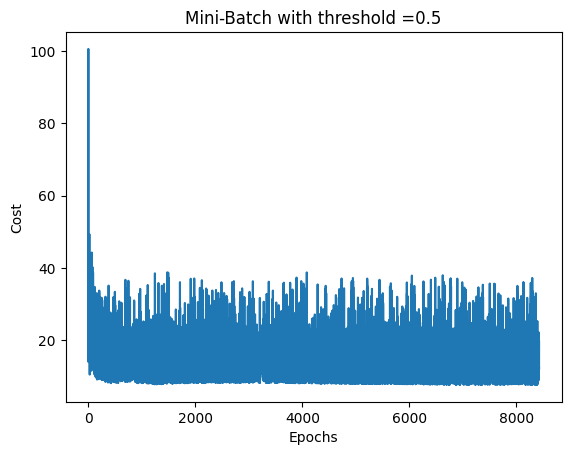

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


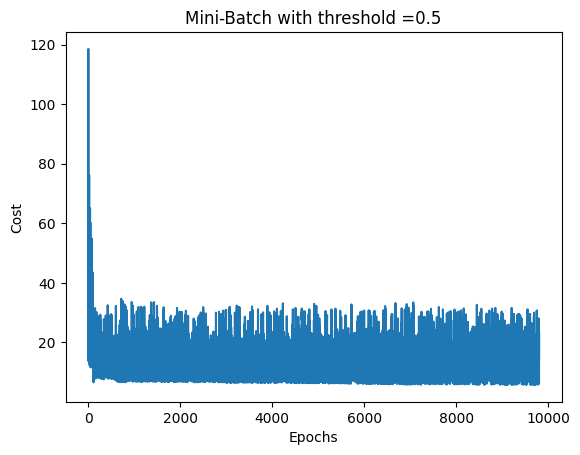

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


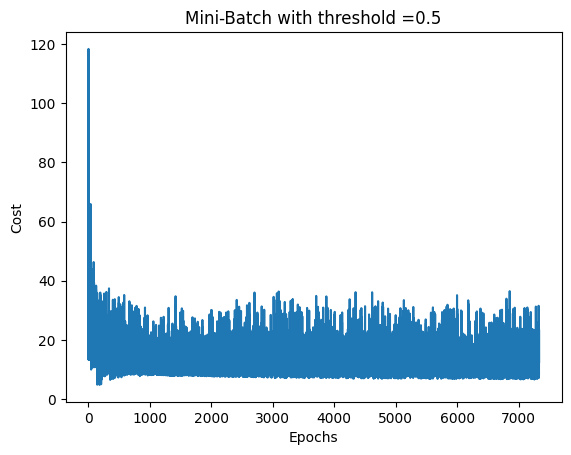

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


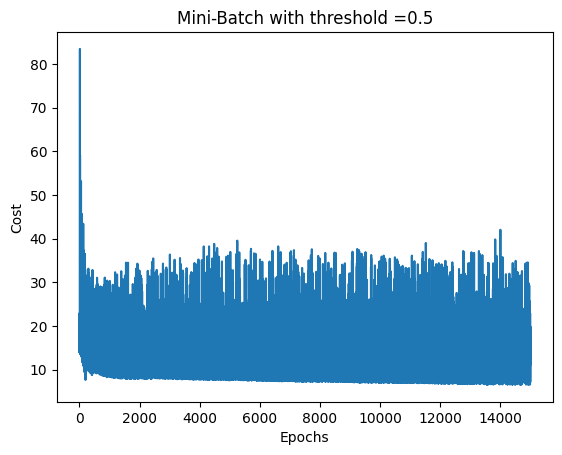

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


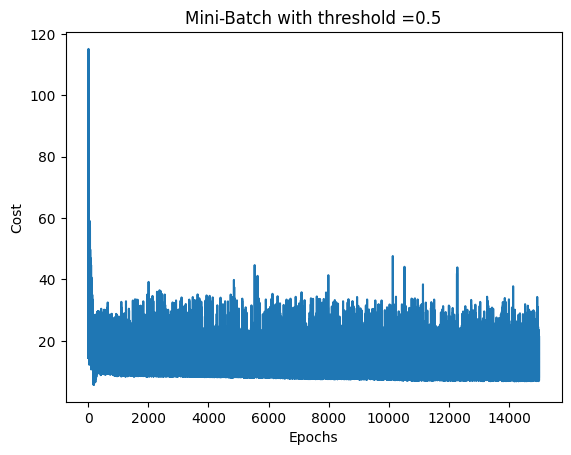

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


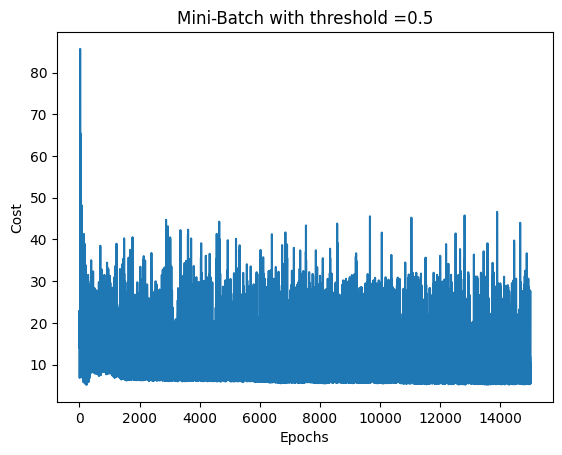

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


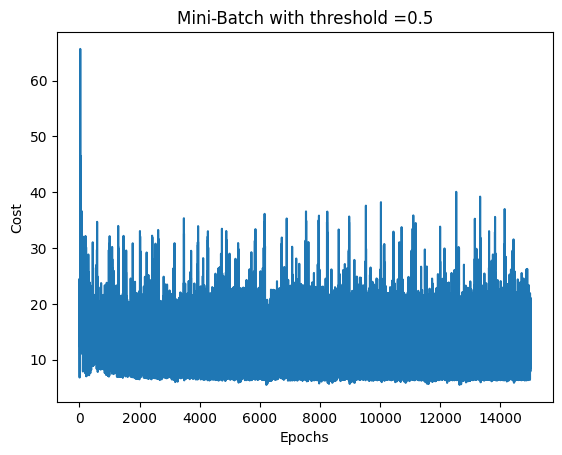

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


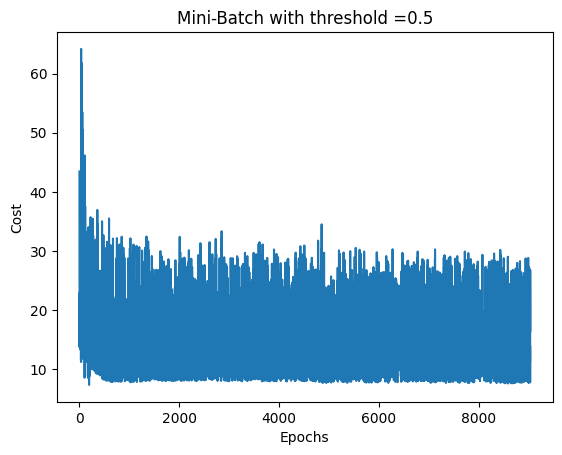

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


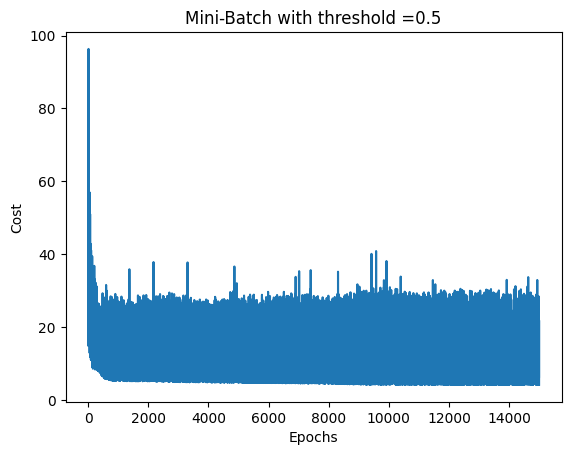

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


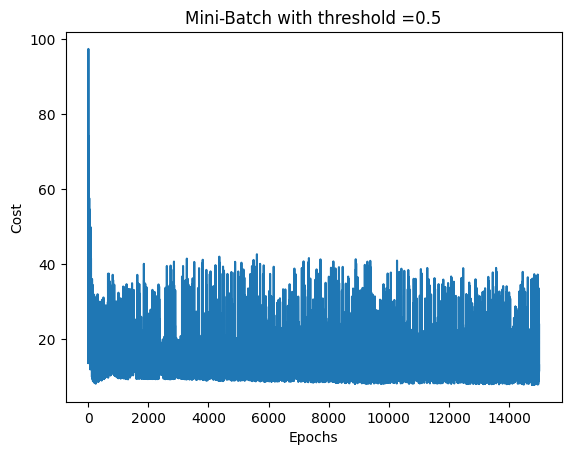

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.8941489361702127
Average precision for  0.3 threshold is = 0.8861317472786603
Average recall for  0.3 threshold is = 0.8481973215502806
Average acucuracy for  0.4 threshold is = 0.8941489361702127
Average precision for  0.4 threshold is = 0.8861317472786603
Average recall for  0.4 threshold is = 0.8481973215502806
Average acucuracy for  0.5 threshold is = 0.8941489361702127
Average precision for  0.5 threshold is = 0.8861317472786603
Average recall for  0.5 threshold is = 0.8481973215502806
Average acucuracy for  0.6 threshold is = 0.8941489361702127
Average precision for  0.6 threshold is = 0.8861317472786603
Average recall for  0.6 threshold is = 0.8481973215502806
Average acucuracy for  0.7 threshold is = 0.8941489361702127
Average precision for  0.7 threshold is = 0.8861317472786603
Average recall for  0.7 threshold is = 0.8481973215502806
Learning Rate= 0.01
STOCHASTIC
375
Threshold = 0.3
Threshold = 0.4
T

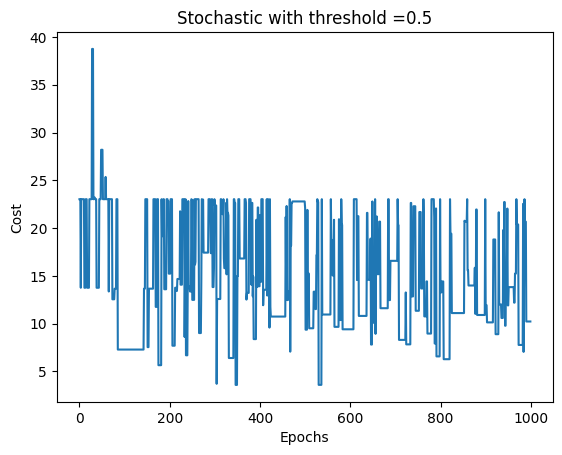

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


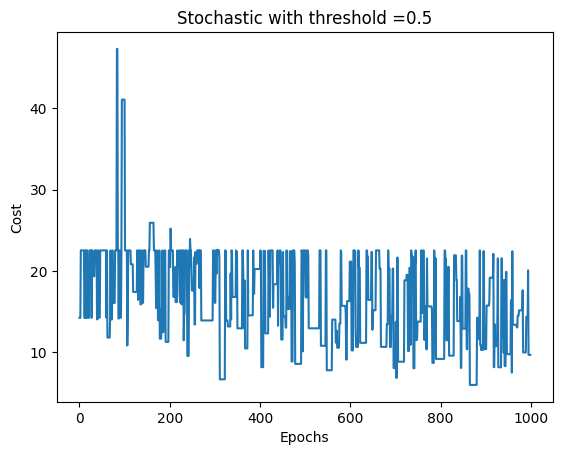

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


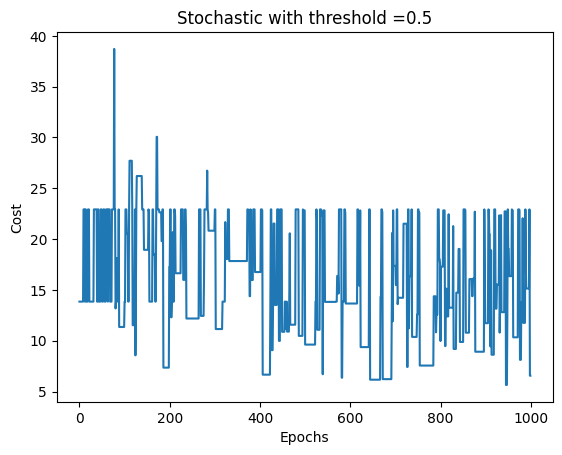

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


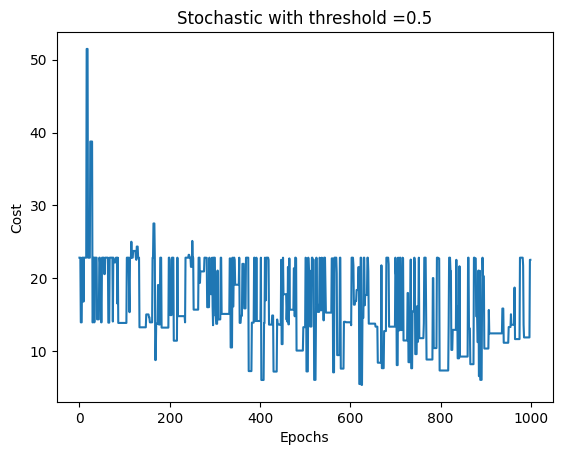

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


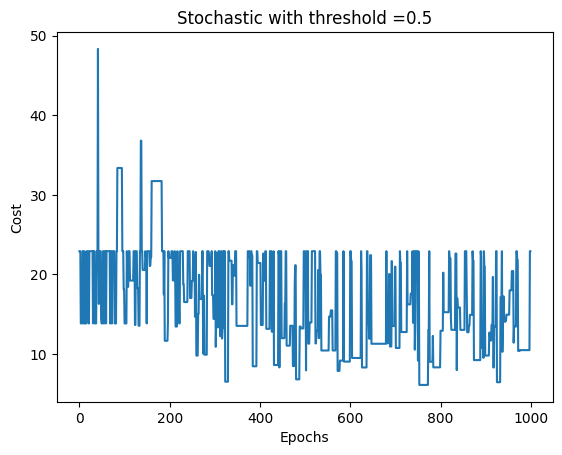

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


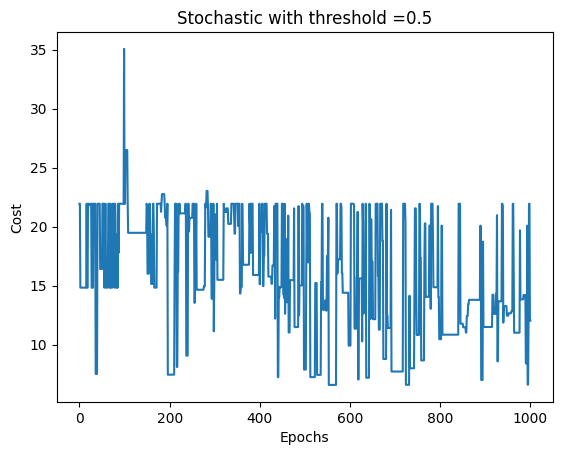

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


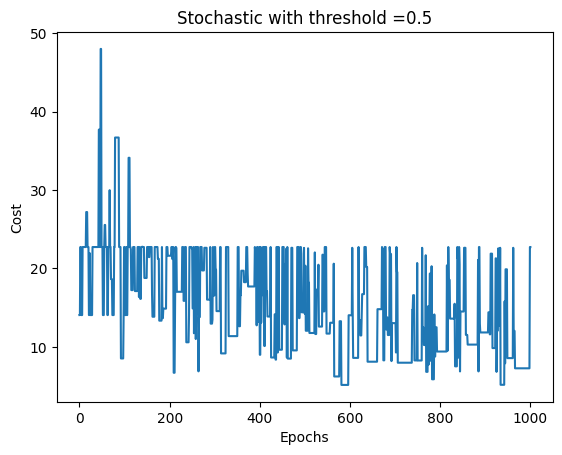

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


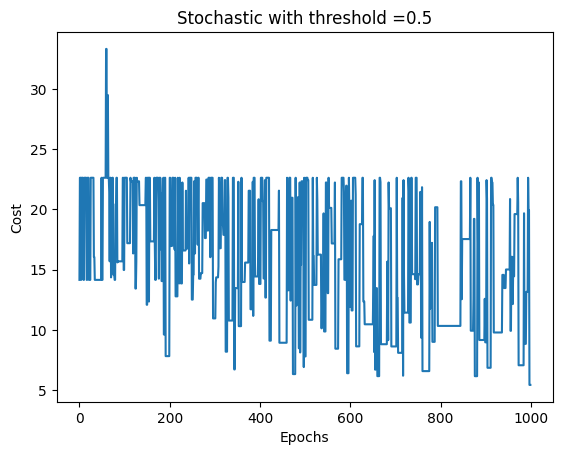

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


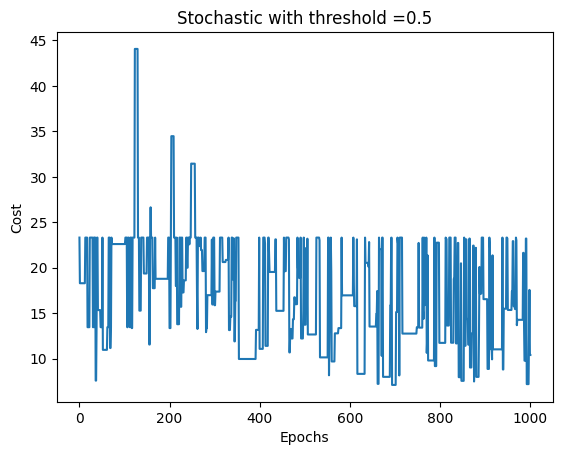

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


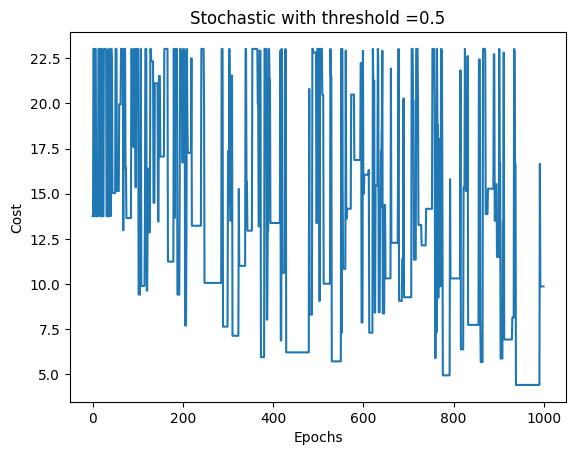

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.7159574468085107
Average precision for  0.3 threshold is = 0.6826751181104155
Average recall for  0.3 threshold is = 0.9163002144051124
Average acucuracy for  0.4 threshold is = 0.7159574468085107
Average precision for  0.4 threshold is = 0.6826751181104155
Average recall for  0.4 threshold is = 0.9163002144051124
Average acucuracy for  0.5 threshold is = 0.7159574468085107
Average precision for  0.5 threshold is = 0.6826751181104155
Average recall for  0.5 threshold is = 0.9163002144051124
Average acucuracy for  0.6 threshold is = 0.7159574468085107
Average precision for  0.6 threshold is = 0.6826751181104155
Average recall for  0.6 threshold is = 0.9163002144051124
Average acucuracy for  0.7 threshold is = 0.7159574468085107
Average precision for  0.7 threshold is = 0.6826751181104155
Average recall for  0.7 threshold is = 0.9163002144051124
Learning Rate= 0.001
BATCH
     radius_mean  texture_mean  perimeter

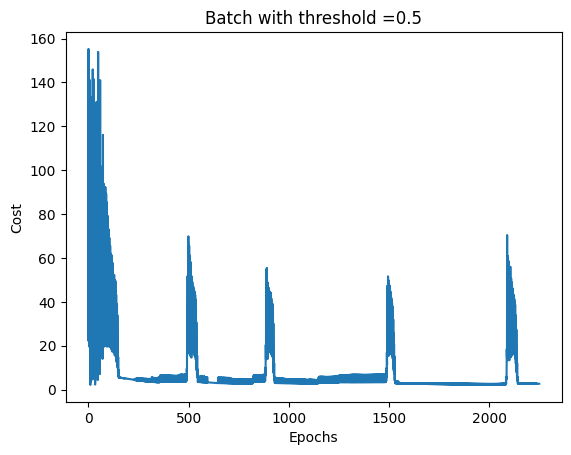

Threshold = 0.6
0.898936170212766 0.8923076923076924 0.8285714285714286
Threshold = 0.7
0.898936170212766 0.8923076923076924 0.8285714285714286
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
4         20.290         14.34          135.10     1297.0          0.10030   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
..           ...           ...             ...        ...              ...   
553        9.333         21.94           59.01      264.0          0.09240   
559       11.510         23.93           74.52      403.5          0.09261   
560       14.050         27.15           91.38      600.4          0.09929   
562       15.220         30.62          103.40      716.9          0.1

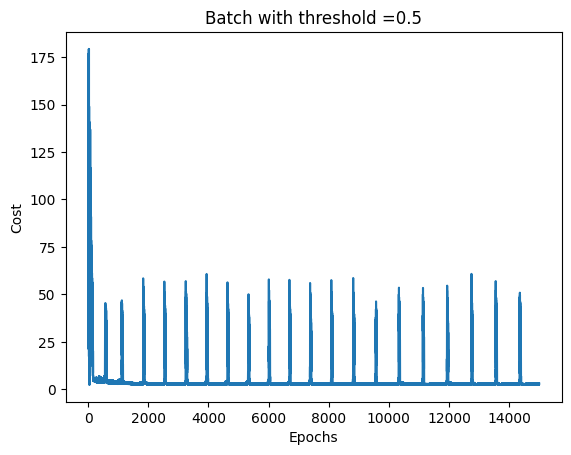

Threshold = 0.6
0.925531914893617 0.8095238095238095 0.9622641509433962
Threshold = 0.7
0.925531914893617 0.8095238095238095 0.9622641509433962
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
3         11.420         20.38           77.58      386.1          0.14250   
12        19.170         24.80          132.40     1123.0          0.09740   
14        13.730         22.61           93.60      578.3          0.11310   
23        21.160         23.04          137.20     1404.0          0.09428   
25        17.140         16.40          116.00      912.7          0.11860   
..           ...           ...             ...        ...              ...   
550       10.860         21.48           68.51      360.5          0.07431   
551       11.130         22.44           71.49      378.4          0.09566   
553        9.333         21.94           59.01      264.0          0.09240   
557        9.423         27.88           59.26      271.3          0.0

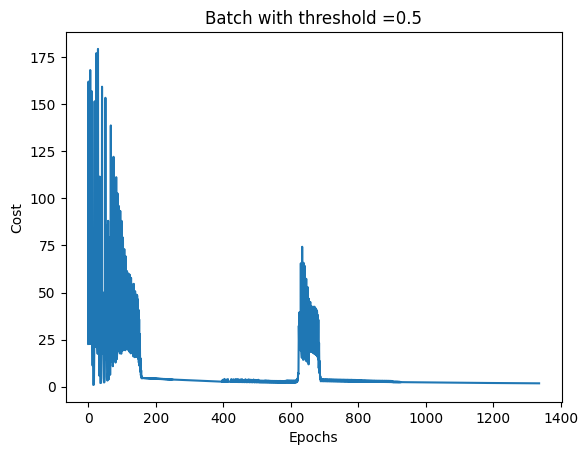

Threshold = 0.6
0.8882978723404256 0.8382352941176471 0.8507462686567164
Threshold = 0.7
0.8882978723404256 0.8382352941176471 0.8507462686567164
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
3         11.420         20.38           77.58      386.1          0.14250   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
21         9.504         12.44           60.34      273.9          0.10240   
..           ...           ...             ...        ...              ...   
558       14.590         22.68           96.39      657.1          0.08473   
560       14.050         27.15           91.38      600.4          0.09929   
563       20.920         25.09          143.00     1347.0          0.10990   
565       20.130         28.25          131.20     1261.0          0

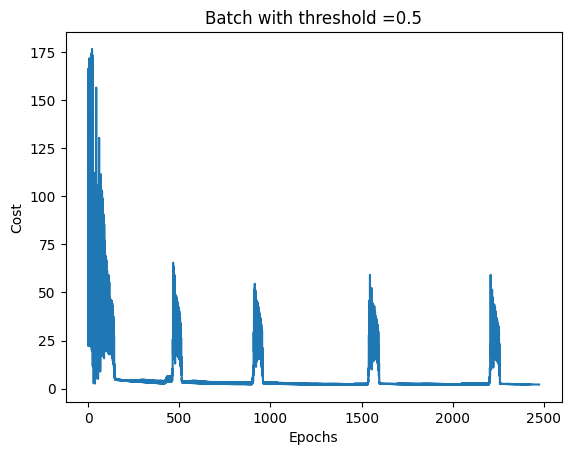

Threshold = 0.6
0.9095744680851063 0.8615384615384616 0.875
Threshold = 0.7
0.9095744680851063 0.8461538461538461 0.8870967741935484
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1          20.57         17.77          132.90     1326.0          0.08474   
3          11.42         20.38           77.58      386.1          0.14250   
8          13.00         21.82           87.50      519.8          0.12730   
10         16.02         23.24          102.70      797.8          0.08206   
12         19.17         24.80          132.40     1123.0          0.09740   
..           ...           ...             ...        ...              ...   
558        14.59         22.68           96.39      657.1          0.08473   
559        11.51         23.93           74.52      403.5          0.09261   
560        14.05         27.15           91.38      600.4          0.09929   
562        15.22         30.62          103.40      716.9          0.10480   
567

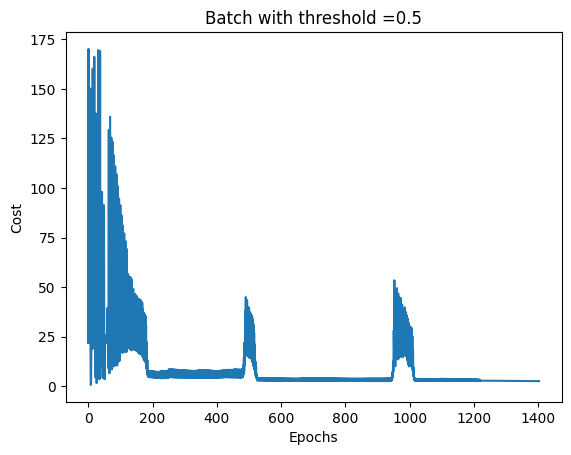

Threshold = 0.6
0.925531914893617 0.8813559322033898 0.8813559322033898
Threshold = 0.7
0.9361702127659575 0.8813559322033898 0.9122807017543859
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
6          18.25         19.98          119.60     1040.0          0.09463   
9          12.46         24.04           83.97      475.9          0.11860   
11         15.78         17.89          103.60      781.0          0.09710   
13         15.85         23.95          103.70      782.7          0.08401   
16         14.68         20.13           94.74      684.5          0.09867   
..           ...           ...             ...        ...              ...   
560        14.05         27.15           91.38      600.4          0.09929   
561        11.20         29.37           70.67      386.0          0.07449   
562        15.22         30.62          103.40      716.9          0.10480   
563        20.92         25.09          143.00     1347.0          0.

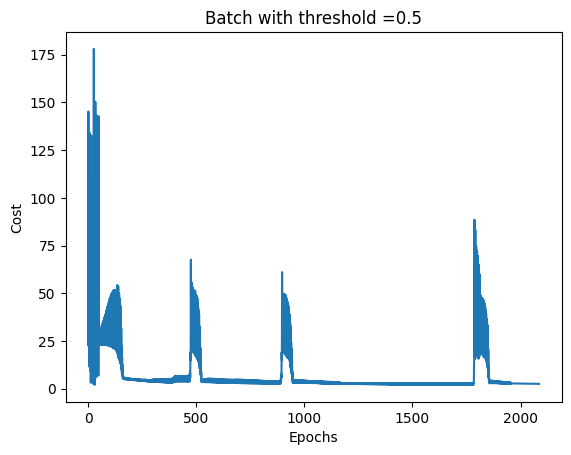

Threshold = 0.6
0.9095744680851063 0.855072463768116 0.8939393939393939
Threshold = 0.7
0.9095744680851063 0.855072463768116 0.8939393939393939
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
9         12.460         24.04           83.97      475.9          0.11860   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
..           ...           ...             ...        ...              ...   
538        7.729         25.49           47.98      178.8          0.08098   
542       14.740         25.42           94.70      668.6          0.08275   
550       10.860         21.48           68.51      360.5          0.07431   
558       14.590         22.68           96.39      657.1          0.0

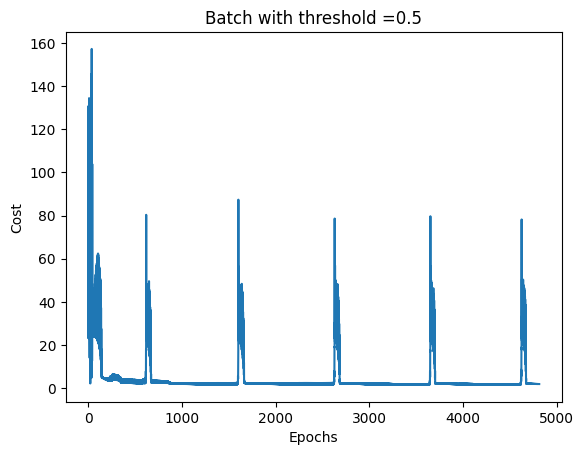

Threshold = 0.6
0.8936170212765957 0.8589743589743589 0.881578947368421
Threshold = 0.7
0.8882978723404256 0.8461538461538461 0.88
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
3          11.42         20.38           77.58      386.1          0.14250   
5          12.45         15.70           82.57      477.1          0.12780   
10         16.02         23.24          102.70      797.8          0.08206   
11         15.78         17.89          103.60      781.0          0.09710   
12         19.17         24.80          132.40     1123.0          0.09740   
..           ...           ...             ...        ...              ...   
558        14.59         22.68           96.39      657.1          0.08473   
562        15.22         30.62          103.40      716.9          0.10480   
565        20.13         28.25          131.20     1261.0          0.09780   
567        20.60         29.33          140.10     1265.0          0.11780   
568  

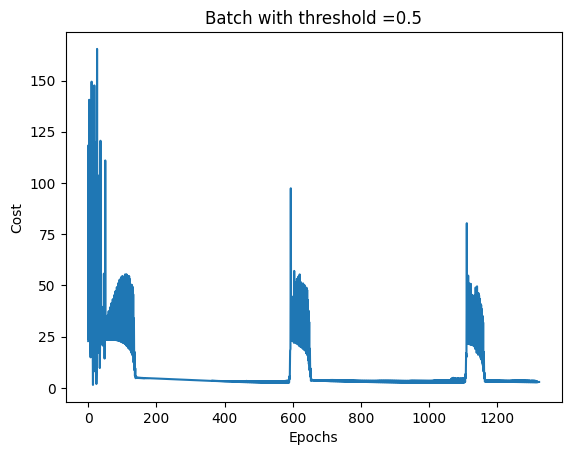

Threshold = 0.6
0.9095744680851063 0.8552631578947368 0.9154929577464789
Threshold = 0.7
0.9095744680851063 0.8552631578947368 0.9154929577464789
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
2         19.690         21.25          130.00     1203.0          0.10960   
5         12.450         15.70           82.57      477.1          0.12780   
7         13.710         20.83           90.20      577.9          0.11890   
10        16.020         23.24          102.70      797.8          0.08206   
..           ...           ...             ...        ...              ...   
550       10.860         21.48           68.51      360.5          0.07431   
553        9.333         21.94           59.01      264.0          0.09240   
555       10.290         27.61           65.67      321.4          0.09030   
558       14.590         22.68           96.39      657.1          0

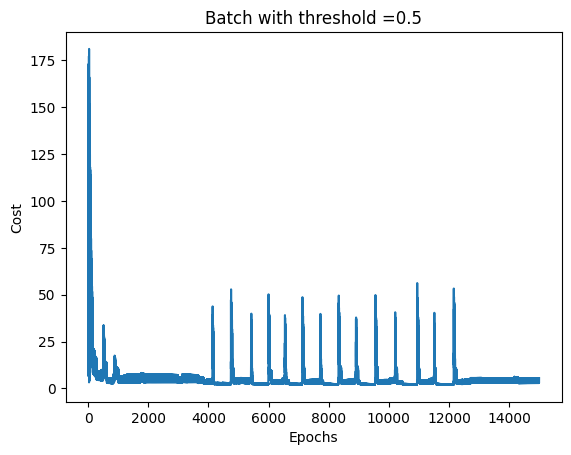

Threshold = 0.6
0.9202127659574468 0.7741935483870968 0.9795918367346939
Threshold = 0.7
0.9202127659574468 0.7741935483870968 0.9795918367346939
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
5          12.45         15.70           82.57      477.1          0.12780   
6          18.25         19.98          119.60     1040.0          0.09463   
..           ...           ...             ...        ...              ...   
561        11.20         29.37           70.67      386.0          0.07449   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0

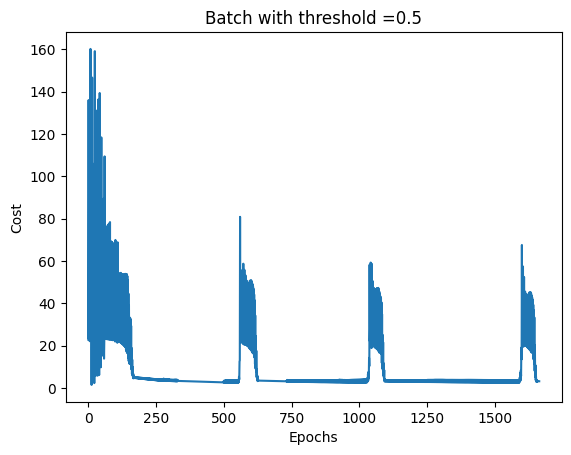

Threshold = 0.6
0.9414893617021277 0.9166666666666666 0.9295774647887324
Threshold = 0.7
0.9468085106382979 0.9166666666666666 0.9428571428571428
Average acucuracy for  0.3 threshold is = 0.9117021276595744
Average precision for  0.3 threshold is = 0.894055957342404
Average recall for  0.3 threshold is = 0.8601741786063988
Average acucuracy for  0.4 threshold is = 0.9117021276595744
Average precision for  0.4 threshold is = 0.897216248476826
Average recall for  0.4 threshold is = 0.8557837267734917
Average acucuracy for  0.5 threshold is = 0.9117021276595744
Average precision for  0.5 threshold is = 0.897216248476826
Average recall for  0.5 threshold is = 0.8557837267734917
Average acucuracy for  0.6 threshold is = 0.9122340425531915
Average precision for  0.6 threshold is = 0.8998118380952651
Average recall for  0.6 threshold is = 0.8543131385381976
Average acucuracy for  0.7 threshold is = 0.9132978723404255
Average precision for  0.7 threshold is = 0.9052840655397185
Average recall 

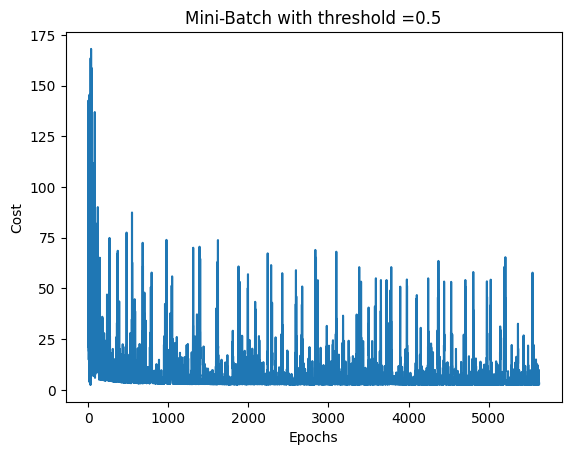

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


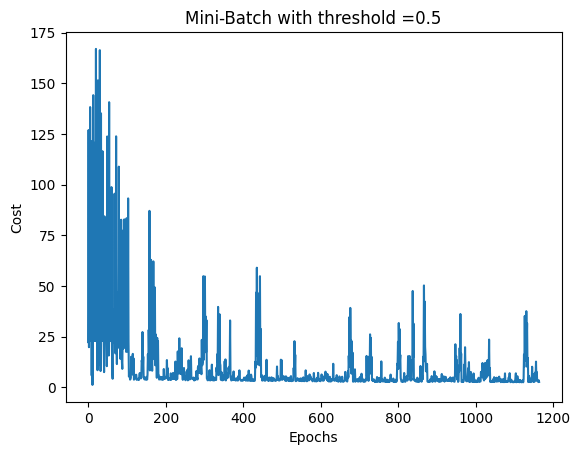

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


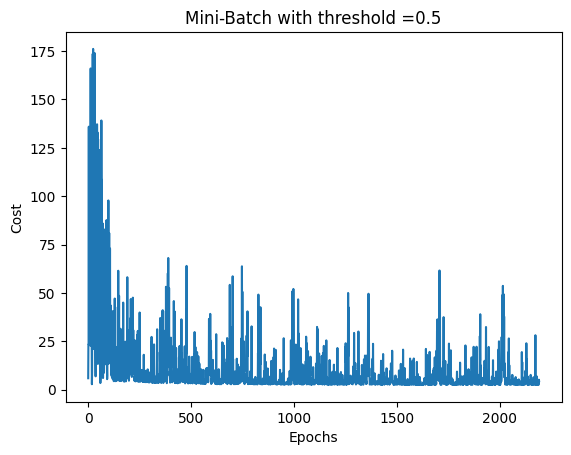

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


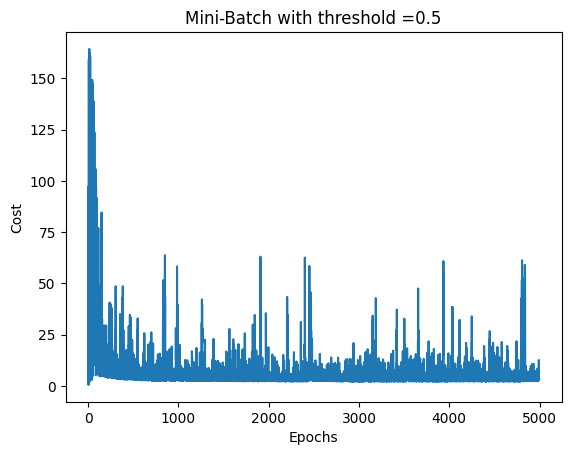

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


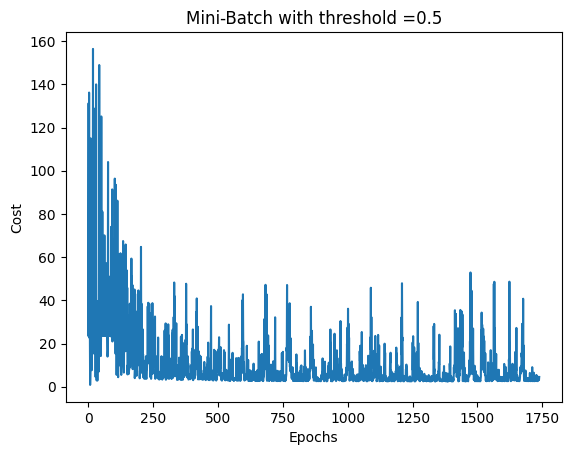

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


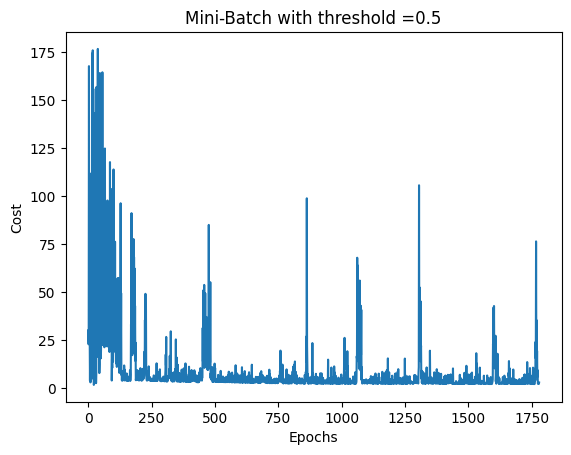

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


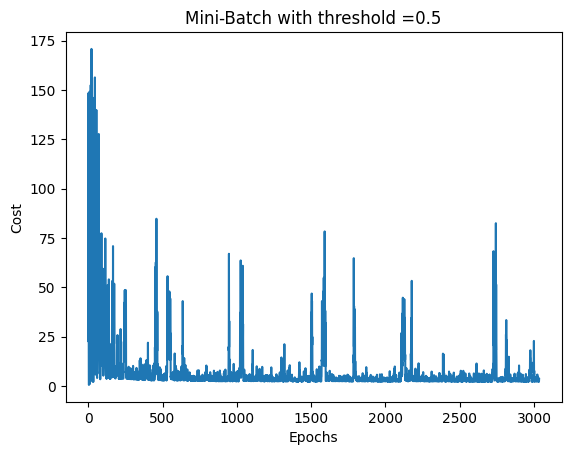

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


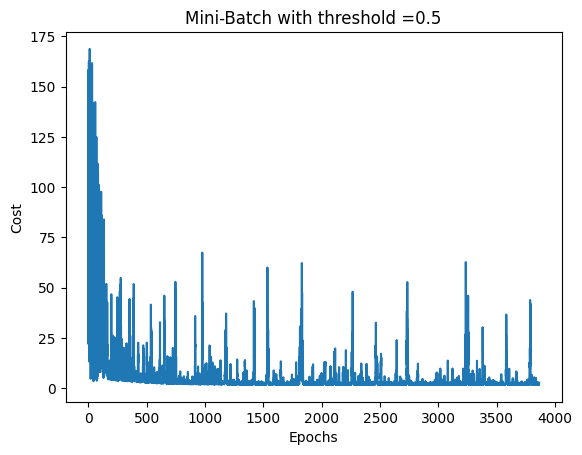

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


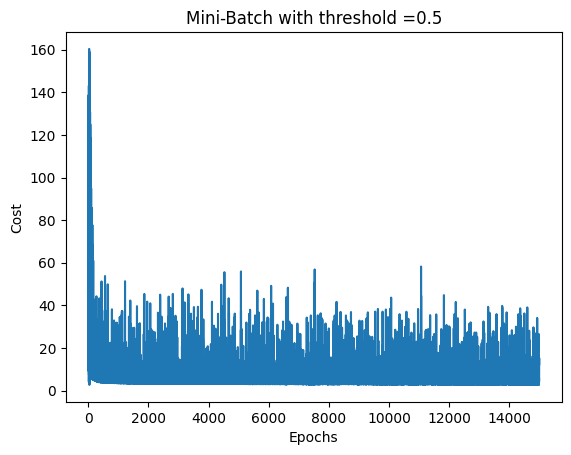

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


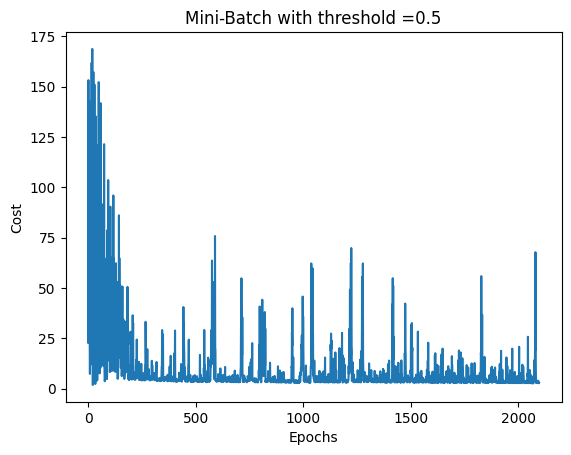

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.8648936170212765
Average precision for  0.3 threshold is = 0.8331381089075954
Average recall for  0.3 threshold is = 0.8859533178978624
Average acucuracy for  0.4 threshold is = 0.8648936170212765
Average precision for  0.4 threshold is = 0.8331381089075954
Average recall for  0.4 threshold is = 0.8859533178978624
Average acucuracy for  0.5 threshold is = 0.8654255319148936
Average precision for  0.5 threshold is = 0.8349857710493752
Average recall for  0.5 threshold is = 0.8859533178978624
Average acucuracy for  0.6 threshold is = 0.8654255319148936
Average precision for  0.6 threshold is = 0.8349857710493752
Average recall for  0.6 threshold is = 0.8859533178978624
Average acucuracy for  0.7 threshold is = 0.8654255319148937
Average precision for  0.7 threshold is = 0.8362504795144262
Average recall for  0.7 threshold is = 0.884544867193637
Learning Rate= 0.001
STOCHASTIC
375
Threshold = 0.3
Threshold = 0.4
T

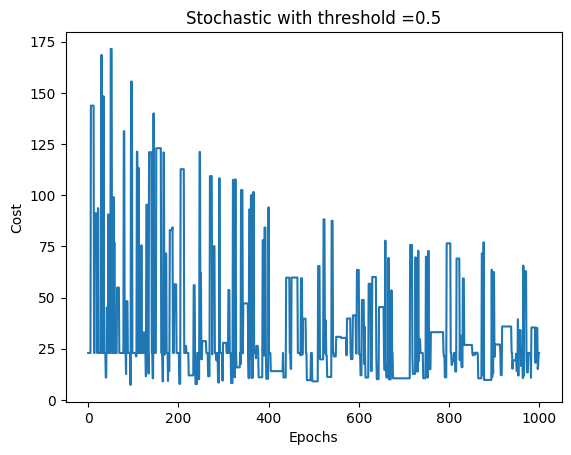

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


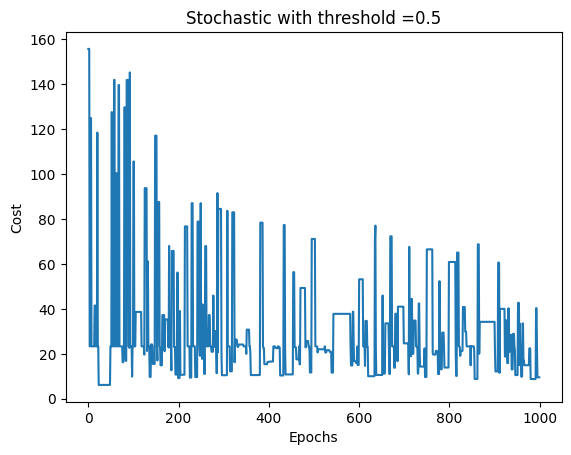

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


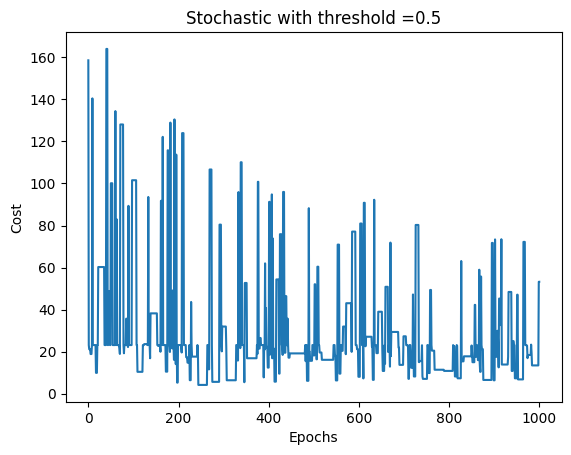

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


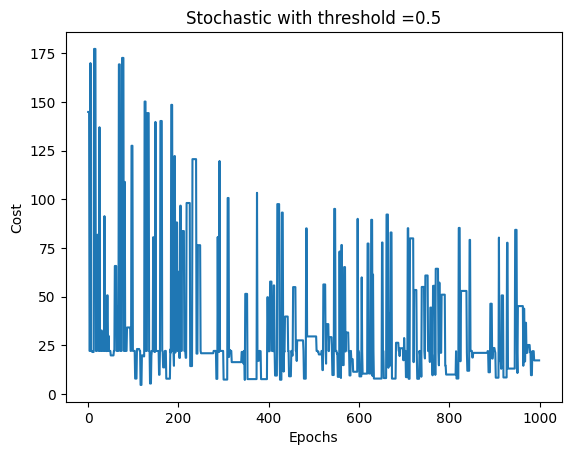

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


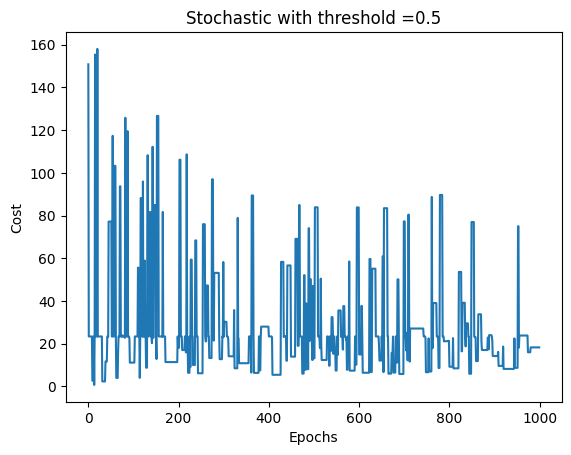

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


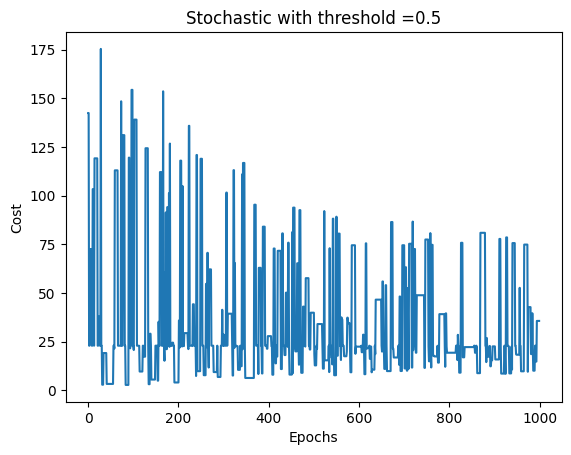

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


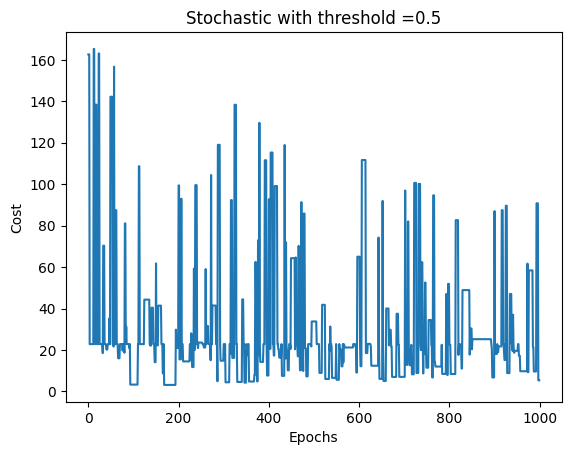

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


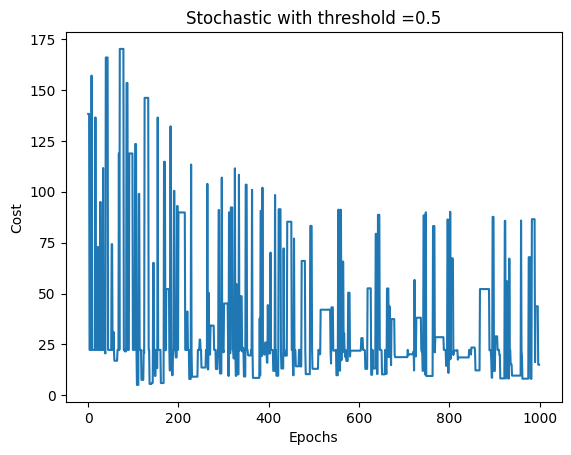

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


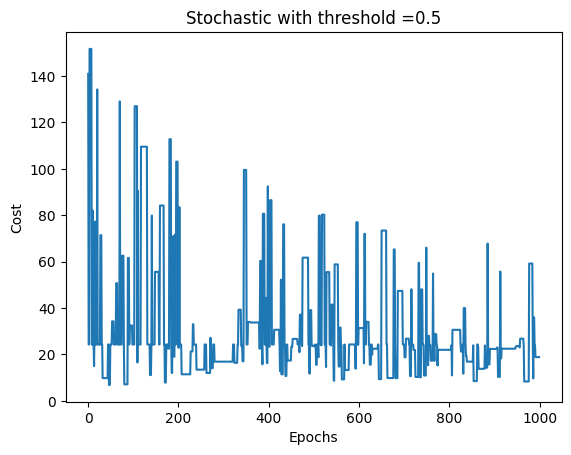

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


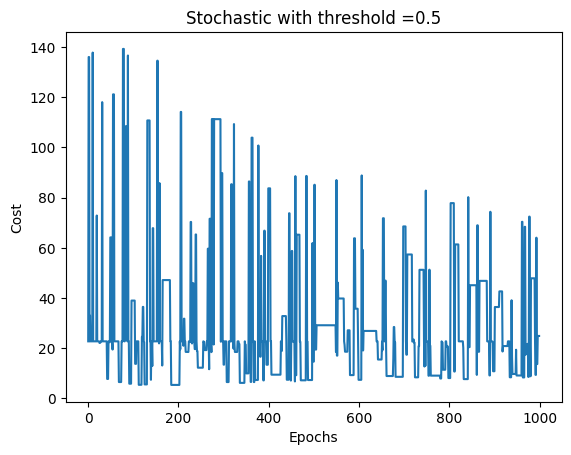

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.7765957446808511
Average precision for  0.3 threshold is = 0.8100887359595752
Average recall for  0.3 threshold is = 0.7742549989734215
Average acucuracy for  0.4 threshold is = 0.7765957446808511
Average precision for  0.4 threshold is = 0.8100887359595752
Average recall for  0.4 threshold is = 0.7742549989734215
Average acucuracy for  0.5 threshold is = 0.7765957446808511
Average precision for  0.5 threshold is = 0.8100887359595752
Average recall for  0.5 threshold is = 0.7742549989734215
Average acucuracy for  0.6 threshold is = 0.7765957446808511
Average precision for  0.6 threshold is = 0.8100887359595752
Average recall for  0.6 threshold is = 0.7742549989734215
Average acucuracy for  0.7 threshold is = 0.777127659574468
Average precision for  0.7 threshold is = 0.8108356326563982
Average recall for  0.7 threshold is = 0.7742549989734215
Learning Rate= 0.0001
BATCH
     radius_mean  texture_mean  perimeter

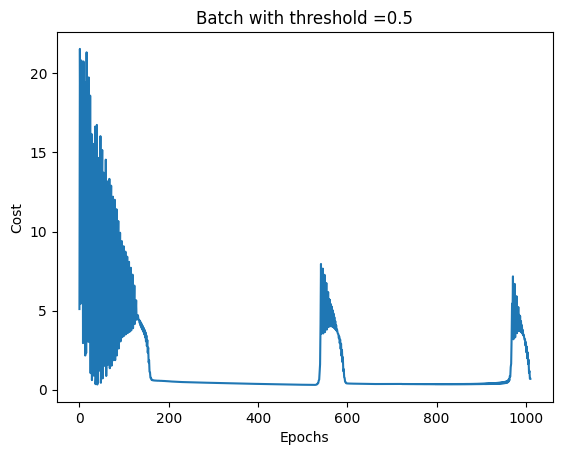

Threshold = 0.6
0.9042553191489362 0.7384615384615385 0.9795918367346939
Threshold = 0.7
0.898936170212766 0.7230769230769231 0.9791666666666666
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
8          13.00         21.82           87.50      519.8          0.12730   
..           ...           ...             ...        ...              ...   
549        10.82         24.21           68.89      361.6          0.08192   
554        12.88         28.92           82.50      514.3          0.08123   
562        15.22         30.62          103.40      716.9          0.10480   
567        20.60         29.33          140.10     1265.0          0.

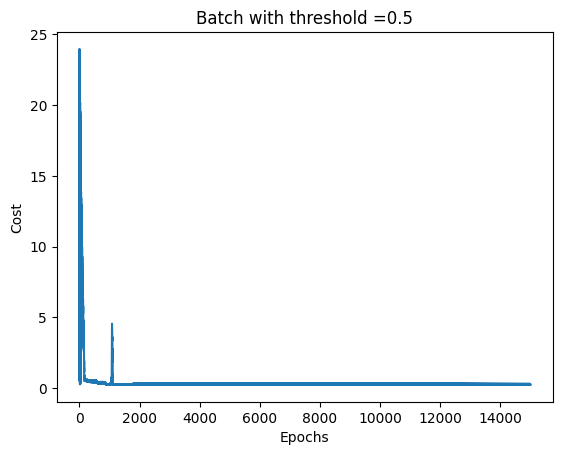

Threshold = 0.6
0.8829787234042553 0.8918918918918919 0.825
Threshold = 0.7
0.8776595744680851 0.8783783783783784 0.8227848101265823
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
4          20.29         14.34          135.10     1297.0          0.10030   
6          18.25         19.98          119.60     1040.0          0.09463   
10         16.02         23.24          102.70      797.8          0.08206   
12         19.17         24.80          132.40     1123.0          0.09740   
..           ...           ...             ...        ...              ...   
558        14.59         22.68           96.39      657.1          0.08473   
562        15.22         30.62          103.40      716.9          0.10480   
563        20.92         25.09          143.00     1347.0          0.10990   
565        20.13         28.25          131.20     1261.0          0.09780   
567

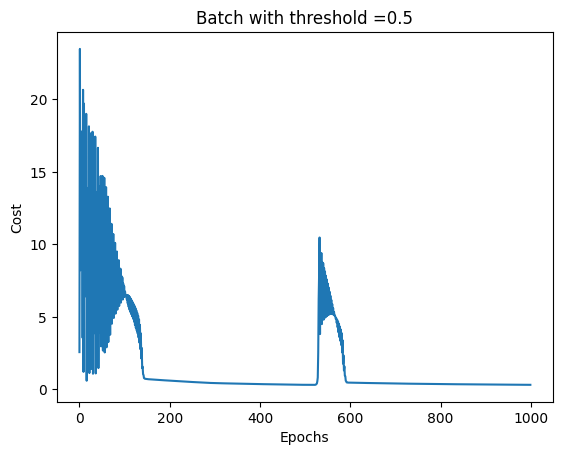

Threshold = 0.6
0.9308510638297872 0.8571428571428571 0.9705882352941176
Threshold = 0.7
0.9308510638297872 0.8571428571428571 0.9705882352941176
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
5          12.45         15.70           82.57      477.1          0.12780   
8          13.00         21.82           87.50      519.8          0.12730   
..           ...           ...             ...        ...              ...   
559        11.51         23.93           74.52      403.5          0.09261   
562        15.22         30.62          103.40      716.9          0.10480   
563        20.92         25.09          143.00     1347.0          0.10990   
565        20.13         28.25          131.20     1261.0          0

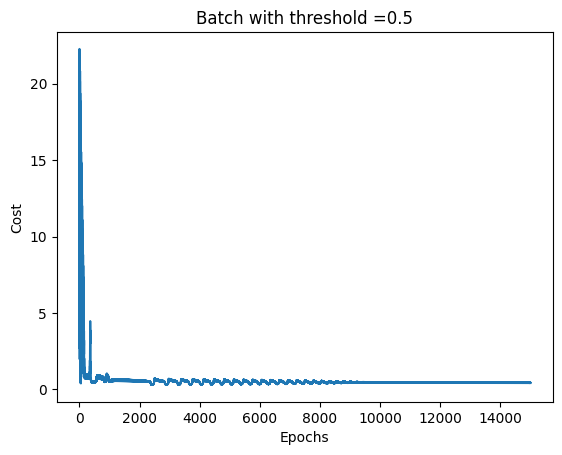

Threshold = 0.6
0.8936170212765957 0.9104477611940298 0.8133333333333334
Threshold = 0.7
0.898936170212766 0.9104477611940298 0.8243243243243243
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
4         20.290         14.34          135.10     1297.0          0.10030   
10        16.020         23.24          102.70      797.8          0.08206   
12        19.170         24.80          132.40     1123.0          0.09740   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
..           ...           ...             ...        ...              ...   
557        9.423         27.88           59.26      271.3          0.08123   
559       11.510         23.93           74.52      403.5          0.09261   
560       14.050         27.15           91.38      600.4          0.09929   
561       11.200         29.37           70.67      386.0          0.

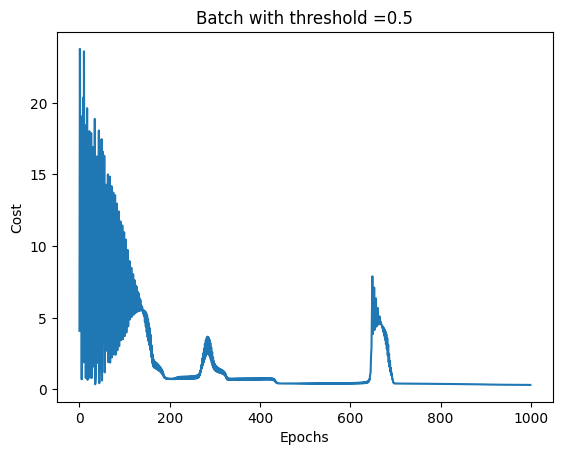

Threshold = 0.6
0.9148936170212766 0.855072463768116 0.9076923076923077
Threshold = 0.7
0.925531914893617 0.855072463768116 0.9365079365079365
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
8          13.00         21.82           87.50      519.8          0.12730   
10         16.02         23.24          102.70      797.8          0.08206   
17         16.13         20.68          108.10      798.8          0.11700   
18         19.81         22.15          130.00     1260.0          0.09831   
26         14.58         21.53           97.41      644.8          0.10540   
..           ...           ...             ...        ...              ...   
556        10.16         19.59           64.73      311.7          0.10030   
560        14.05         27.15           91.38      600.4          0.09929   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08

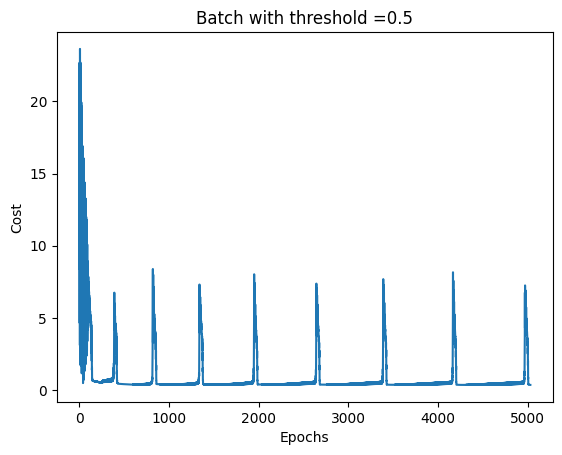

Threshold = 0.6
0.9414893617021277 0.9253731343283582 0.9117647058823529
Threshold = 0.7
0.9414893617021277 0.9253731343283582 0.9117647058823529
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1          20.57         17.77          132.90     1326.0          0.08474   
3          11.42         20.38           77.58      386.1          0.14250   
10         16.02         23.24          102.70      797.8          0.08206   
11         15.78         17.89          103.60      781.0          0.09710   
13         15.85         23.95          103.70      782.7          0.08401   
..           ...           ...             ...        ...              ...   
555        10.29         27.61           65.67      321.4          0.09030   
562        15.22         30.62          103.40      716.9          0.10480   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0

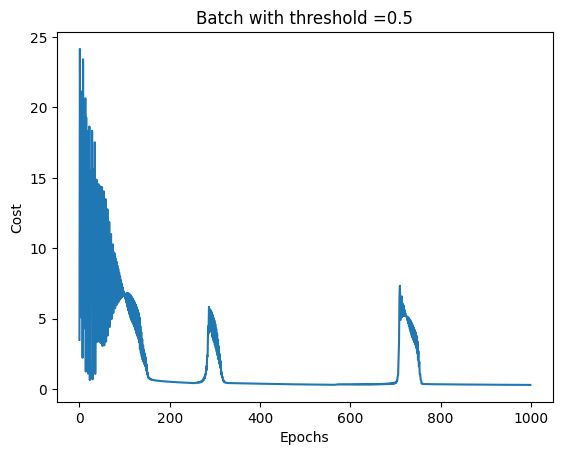

Threshold = 0.6
0.8829787234042553 0.8181818181818182 0.8873239436619719
Threshold = 0.7
0.8776595744680851 0.8051948051948052 0.8857142857142857
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
5          12.45         15.70           82.57      477.1          0.12780   
7          13.71         20.83           90.20      577.9          0.11890   
9          12.46         24.04           83.97      475.9          0.11860   
14         13.73         22.61           93.60      578.3          0.11310   
16         14.68         20.13           94.74      684.5          0.09867   
..           ...           ...             ...        ...              ...   
561        11.20         29.37           70.67      386.0          0.07449   
562        15.22         30.62          103.40      716.9          0.10480   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0

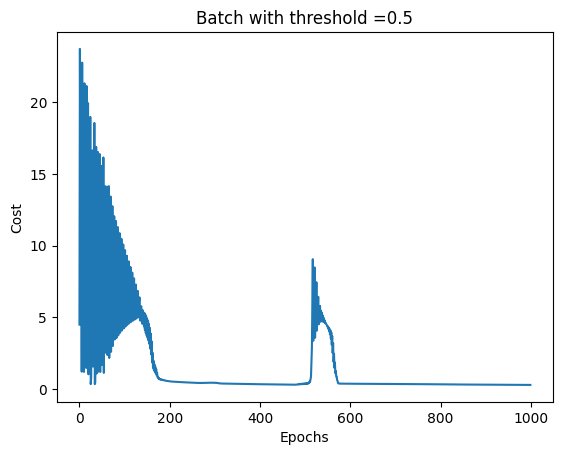

Threshold = 0.6
0.9095744680851063 0.8333333333333334 0.9230769230769231
Threshold = 0.7
0.9095744680851063 0.8194444444444444 0.9365079365079365
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1          20.57         17.77          132.90     1326.0          0.08474   
3          11.42         20.38           77.58      386.1          0.14250   
7          13.71         20.83           90.20      577.9          0.11890   
11         15.78         17.89          103.60      781.0          0.09710   
17         16.13         20.68          108.10      798.8          0.11700   
..           ...           ...             ...        ...              ...   
551        11.13         22.44           71.49      378.4          0.09566   
559        11.51         23.93           74.52      403.5          0.09261   
560        14.05         27.15           91.38      600.4          0.09929   
561        11.20         29.37           70.67      386.0          0

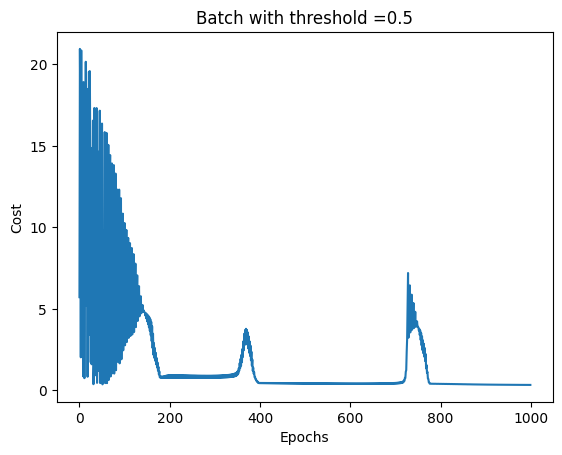

Threshold = 0.6
0.9042553191489362 0.8852459016393442 0.8307692307692308
Threshold = 0.7
0.9148936170212766 0.8688524590163934 0.8688524590163934
BATCH
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
560       14.050         27.15           91.38      600.4          0.09929   
565       20.130         28.25          131.20     1261.0          0

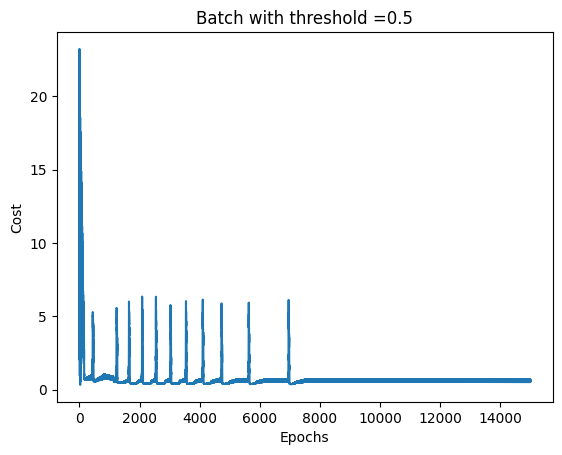

Threshold = 0.6
0.9202127659574468 0.8028169014084507 0.9827586206896551
Threshold = 0.7
0.9202127659574468 0.8028169014084507 0.9827586206896551
Average acucuracy for  0.3 threshold is = 0.9005319148936171
Average precision for  0.3 threshold is = 0.8707653015851569
Average recall for  0.3 threshold is = 0.871565874765571
Average acucuracy for  0.4 threshold is = 0.9047872340425532
Average precision for  0.4 threshold is = 0.8878580255096974
Average recall for  0.4 threshold is = 0.8615727222678258
Average acucuracy for  0.5 threshold is = 0.90531914893617
Average precision for  0.5 threshold is = 0.8931772295748627
Average recall for  0.5 threshold is = 0.8562273430094031
Average acucuracy for  0.6 threshold is = 0.9085106382978723
Average precision for  0.6 threshold is = 0.9031899137134586
Average recall for  0.6 threshold is = 0.8517967601349739
Average acucuracy for  0.7 threshold is = 0.9095744680851063
Average precision for  0.7 threshold is = 0.9118969980730252
Average recall 

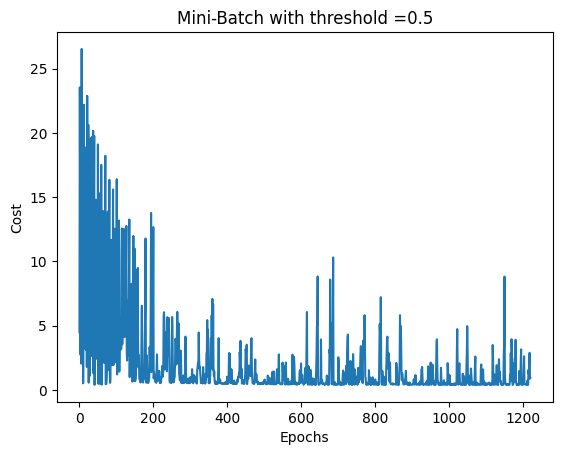

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


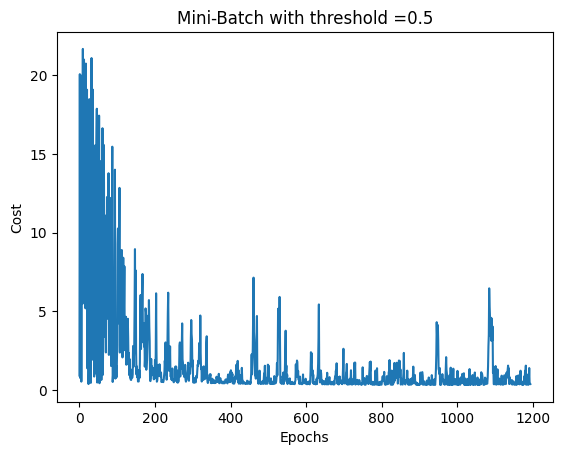

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


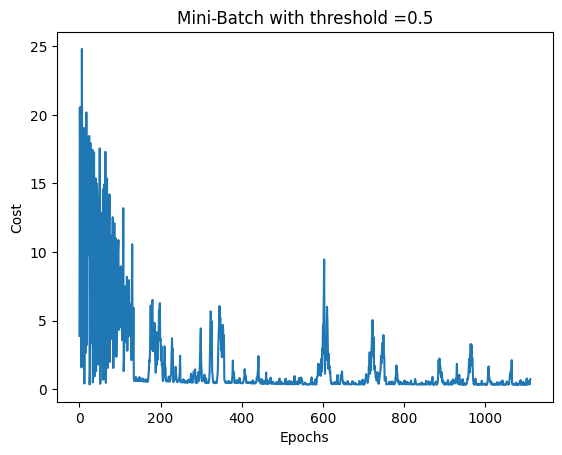

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


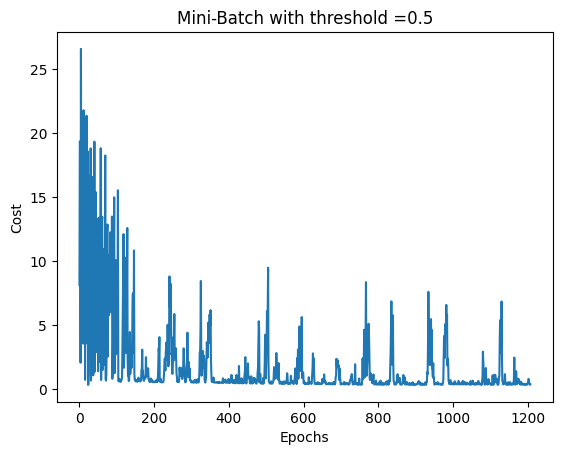

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


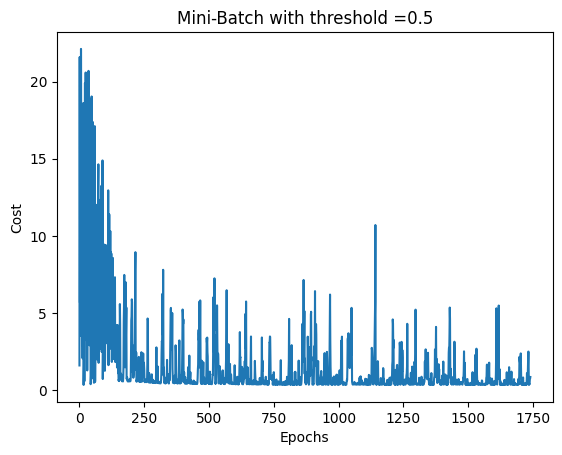

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


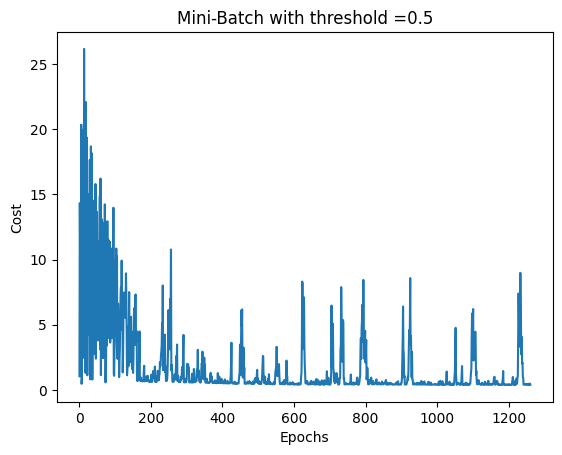

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


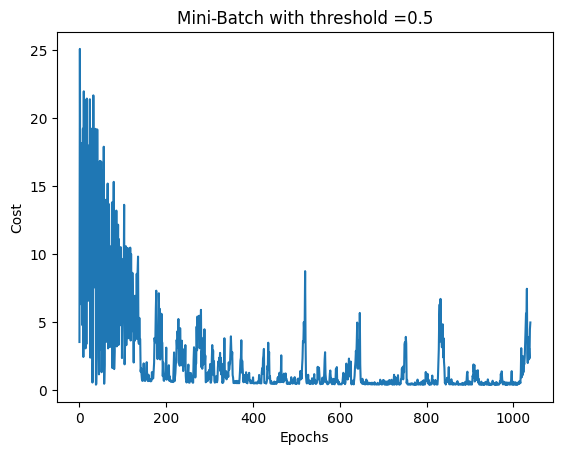

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


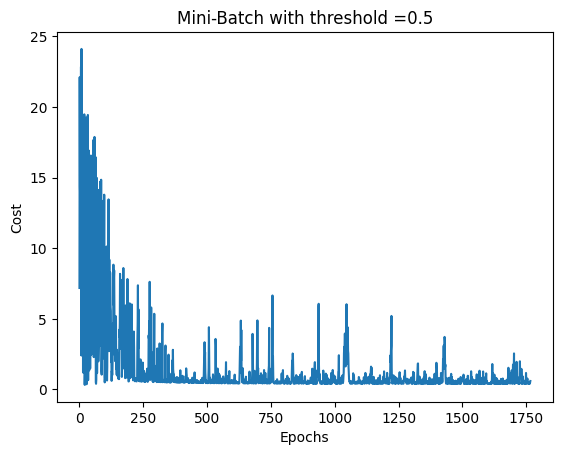

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


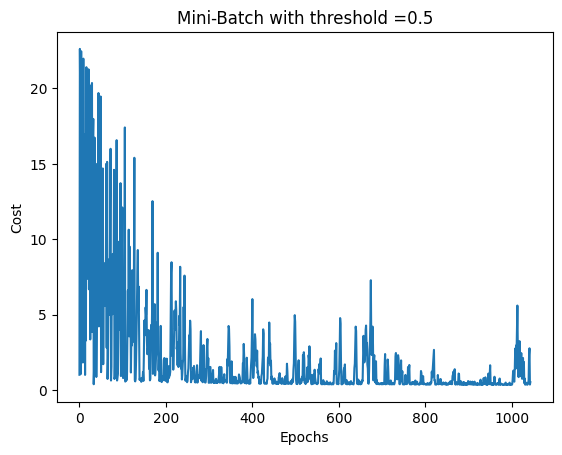

Threshold = 0.6
Threshold = 0.7
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


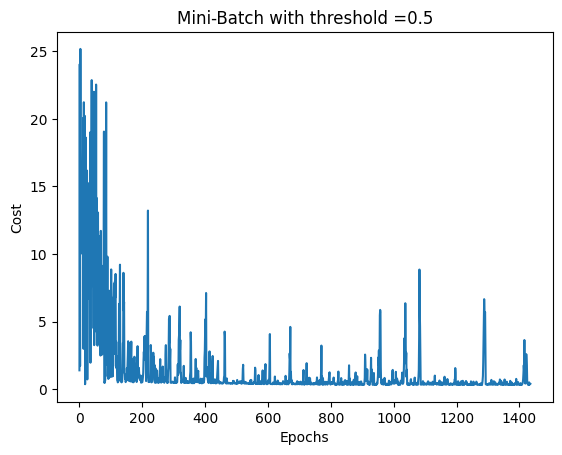

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.8473404255319149
Average precision for  0.3 threshold is = 0.8347789249879061
Average recall for  0.3 threshold is = 0.8675840918148322
Average acucuracy for  0.4 threshold is = 0.8494680851063829
Average precision for  0.4 threshold is = 0.8447869396575329
Average recall for  0.4 threshold is = 0.8566311867329583
Average acucuracy for  0.5 threshold is = 0.850531914893617
Average precision for  0.5 threshold is = 0.8511211334987235
Average recall for  0.5 threshold is = 0.8473255870155938
Average acucuracy for  0.6 threshold is = 0.852659574468085
Average precision for  0.6 threshold is = 0.8587099160704607
Average recall for  0.6 threshold is = 0.8408386857921196
Average acucuracy for  0.7 threshold is = 0.8515957446808511
Average precision for  0.7 threshold is = 0.863579725793137
Average recall for  0.7 threshold is = 0.8275779137078182
Learning Rate= 0.0001
STOCHASTIC
375
Threshold = 0.3
Threshold = 0.4
Th

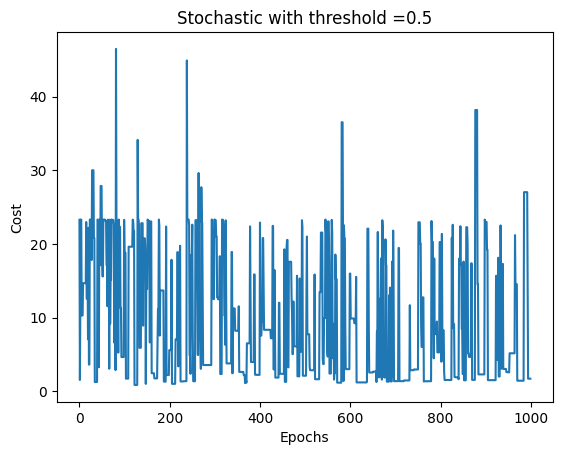

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


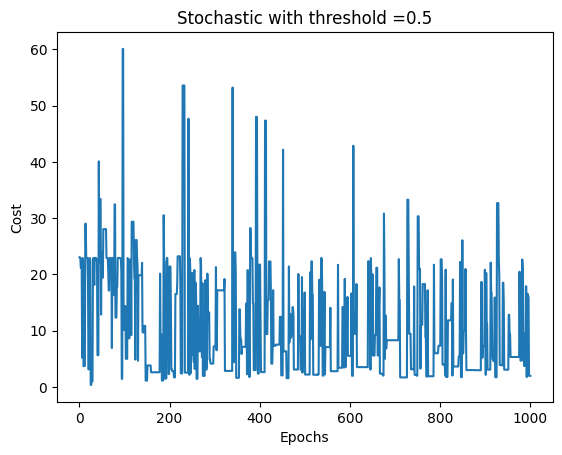

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


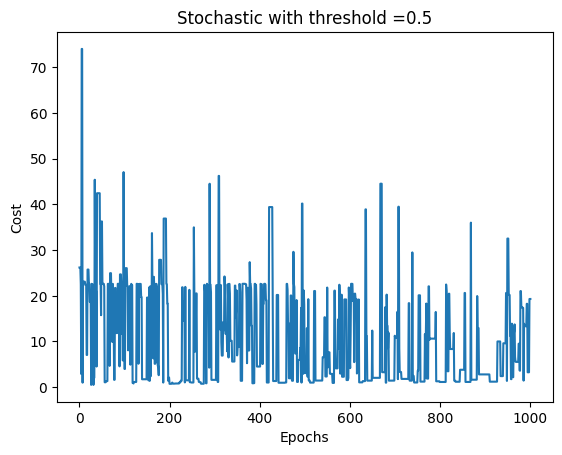

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


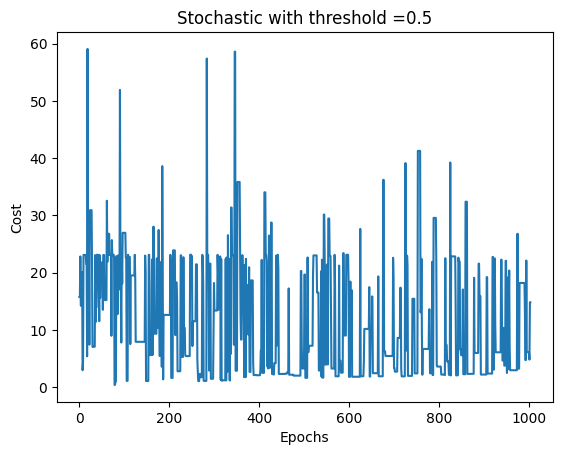

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


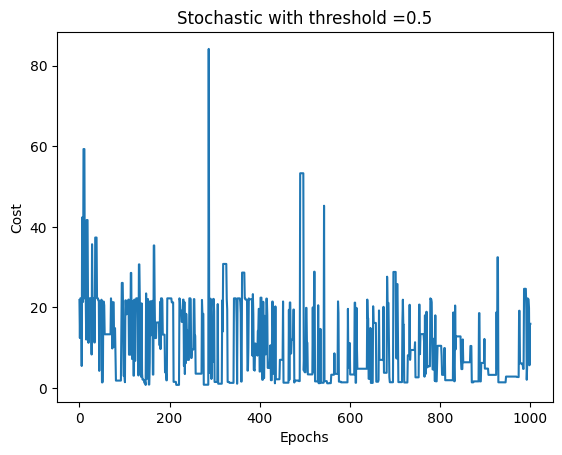

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


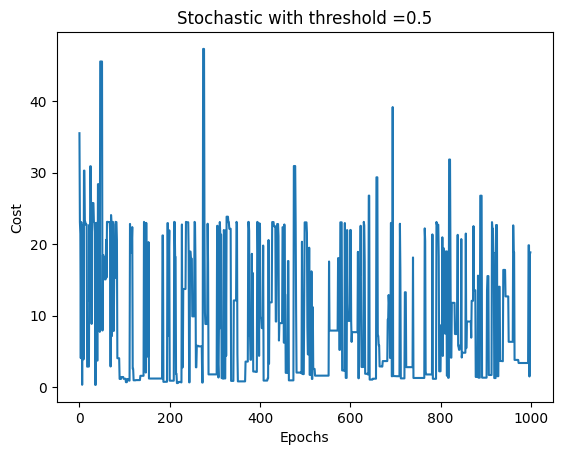

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


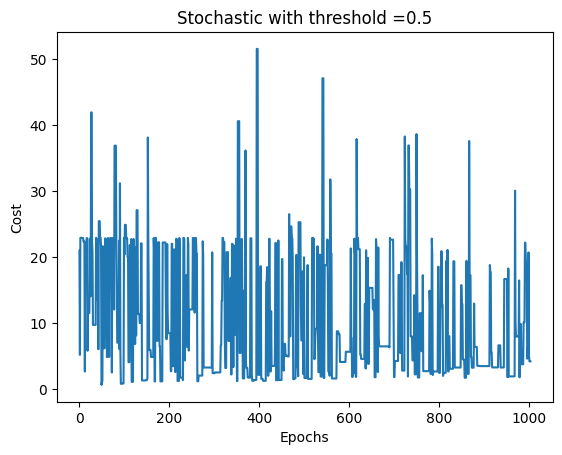

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


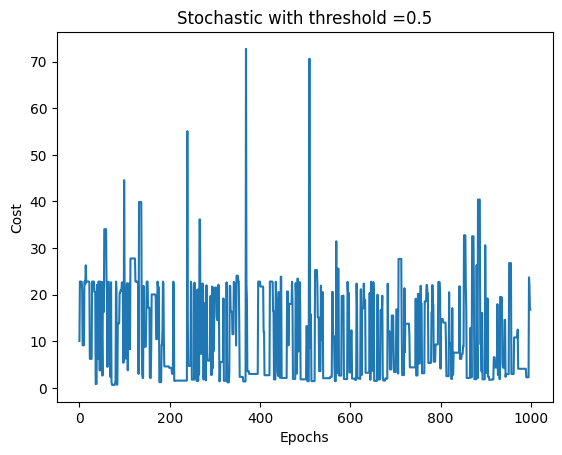

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


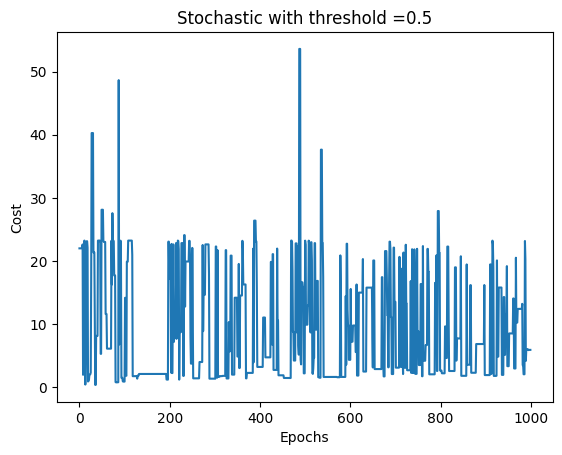

Threshold = 0.6
Threshold = 0.7
375
Threshold = 0.3
Threshold = 0.4
Threshold = 0.5


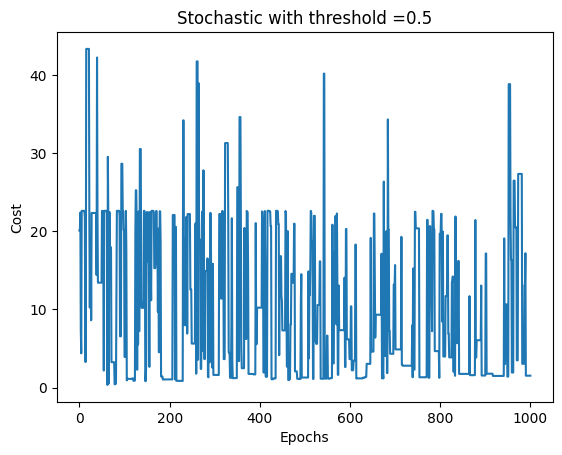

Threshold = 0.6
Threshold = 0.7
Average acucuracy for  0.3 threshold is = 0.6946808510638298
Average precision for  0.3 threshold is = 0.7328141715852242
Average recall for  0.3 threshold is = 0.7633925574960129
Average acucuracy for  0.4 threshold is = 0.6946808510638298
Average precision for  0.4 threshold is = 0.7339861429281154
Average recall for  0.4 threshold is = 0.7605301571688813
Average acucuracy for  0.5 threshold is = 0.6957446808510638
Average precision for  0.5 threshold is = 0.736489740120361
Average recall for  0.5 threshold is = 0.7605301571688813
Average acucuracy for  0.6 threshold is = 0.698404255319149
Average precision for  0.6 threshold is = 0.7378658664817248
Average recall for  0.6 threshold is = 0.7605301571688813
Average acucuracy for  0.7 threshold is = 0.7015957446808511
Average precision for  0.7 threshold is = 0.740311696119391
Average recall for  0.7 threshold is = 0.7605301571688813


In [316]:
threshval=[0.3,0.4,0.5,0.6,0.7]
learnVal=[0.01,0.001,0.0001]
modals=[0,1,2]
accuracyVal=[]
precisionVal=[]
recallVal=[]
count=0
for learn in learnVal:
    for mode in modals:
        print("Learning Rate=", learn)
        models(mode,learn,threshval,70)
